# 0. Data Understanding 

# 1.0 Datenvorbereitung

In [195]:
# Importieren wichtiger Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.1 Einlesen und Überblick

In [196]:
# Bevor wir den Datensatz einlesen, legen wir die maximale Anzahl von Spalten fest, die in Python angezeigt werden sollen
# Im vorliegenden Code möchten wir, dass es keine Begrenzung gibt

pd.options.display.max_columns = None

In [197]:
# Einlesen des Datensatzes und erster Überblick über die Daten in Reihen und Spalten
data  = pd.read_csv("data.csv")
data.head()

,Zeitstempel,Filiale,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag
0,2016-01-03 08:01:46,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN
1,2016-01-03 08:04:45,Sulgen Filiale,Buttergipfeli,2.0,2.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN
2,2016-01-03 08:09:21,Sulgen Filiale,Buttergipfeli,12.0,15.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN
3,2016-01-03 08:11:19,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN
4,2016-01-03 08:11:19,Sulgen Filiale,Buttergipfeli,4.0,5.2,0.0,NaN,0.0,NaN,NaN,0.0,NaN


In [198]:
# Erstellen eines Backups des Datensatzes
data_backup = data.copy()

### 1.2 Transformation des Datensatzes

In [199]:
# Trennen des Zeitstempels in einzelne Spalten
data["Zeitstempel"] = pd.to_datetime(data["Zeitstempel"])
data["Uhrzeit"] = pd.to_datetime(data["Zeitstempel"]).dt.time
data["Stunde"] = pd.to_datetime(data["Zeitstempel"]).dt.hour
data["Datum"] = pd.to_datetime(data["Zeitstempel"]).dt.date
data["Wochentag"] = pd.to_datetime(data["Zeitstempel"]).dt.day_name()

# Konvertieren der Spalten in die richtigen Datentypen
data["Datum"] = pd.to_datetime(data["Datum"]).dt.date
data['Monat'] = pd.to_datetime(data['Datum']).dt.month
wochentag_reihenfolge = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data["Wochentag"] = pd.Categorical(data["Wochentag"], categories = wochentag_reihenfolge, ordered = True)

# Umwandeln der Variable Wochentag in numerische Werte
data["Wochentag"] = data["Wochentag"].replace(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], [1, 2, 3, 4, 5, 6, 7])

data.head()

,Zeitstempel,Filiale,Artikel,Menge,Umsatz,Bestellungen,Temperatur,Niederschlag,Globalstrahlung,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat
0,2016-01-03 08:01:46,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1
1,2016-01-03 08:04:45,Sulgen Filiale,Buttergipfeli,2.0,2.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1
2,2016-01-03 08:09:21,Sulgen Filiale,Buttergipfeli,12.0,15.6,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1
3,2016-01-03 08:11:19,Sulgen Filiale,Butterzopf mittel,1.0,6.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1
4,2016-01-03 08:11:19,Sulgen Filiale,Buttergipfeli,4.0,5.2,0.0,NaN,0.0,NaN,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1


### 1.3 Entfernen ungenutzter Features


In [200]:
# Entfernen nicht mehr benötigter Features
data = data.drop(columns = ["Filiale", "Zeitstempel"], axis = "columns")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727754 entries, 0 to 727753
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Artikel                      727754 non-null  object  
 1   Menge                        727754 non-null  float64 
 2   Umsatz                       727754 non-null  float64 
 3   Bestellungen                 727754 non-null  float64 
 4   Temperatur                   718722 non-null  float64 
 5   Niederschlag                 725226 non-null  float64 
 6   Globalstrahlung              718722 non-null  float64 
 7   Temperatur Schnitt Tag       719687 non-null  float64 
 8   Niederschlag Summe Tag       727754 non-null  float64 
 9   Globalstrahlung Schnitt Tag  719687 non-null  float64 
 10  Uhrzeit                      727754 non-null  object  
 11  Stunde                       727754 non-null  int64   
 12  Datum                        727754 non-null

In [201]:
# Überprüfen, ob gewisse Transaktion ausserhalb der Öffnungszeiten verbucht wurden. Die Bäckerei hat von 05:30 bis 19:00 Uhr geöffnet.

# Transaktionen vor offizieller Öffnungszeit
data_4_uhr = data[data["Stunde"] == 4]
data_4_uhr.head()

# Entfernern der Transaktionen vor 5 Uhr, da Ausreisser gefunden wurden
data = data[data["Stunde"] >= 5]

# Transaktionen nach offizieller Öffnungszeit
data_20_uhr = data[data["Stunde"] == 20]
data_20_uhr.head()
data = data[data["Stunde"] <= 20]


In [202]:
# Löschen von Temperatur und Globalstrahlung, da wir nur die aggregierten Werte verwenden können
data = data.drop(columns = ["Temperatur", "Globalstrahlung"], axis = "columns")
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1


In [203]:
# Entfernen von Duplikaten
data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719185 entries, 0 to 727753
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Artikel                      719185 non-null  object  
 1   Menge                        719185 non-null  float64 
 2   Umsatz                       719185 non-null  float64 
 3   Bestellungen                 719185 non-null  float64 
 4   Niederschlag                 716688 non-null  float64 
 5   Temperatur Schnitt Tag       711227 non-null  float64 
 6   Niederschlag Summe Tag       719185 non-null  float64 
 7   Globalstrahlung Schnitt Tag  711227 non-null  float64 
 8   Uhrzeit                      719185 non-null  object  
 9   Stunde                       719185 non-null  int64   
 10  Datum                        719185 non-null  object  
 11  Wochentag                    719185 non-null  category
 12  Monat                        719185 non-null

In [204]:
# Stückpreis berechnen und eine neue Spalte zum Datensatz data hinzufügen
data["Stückpreis"] = pd.to_numeric(data["Umsatz"] / data["Menge"]).apply(lambda x: '{:.2f}'.format(x))

# Sortieren nach Stückpreis
data_preis = data.sort_values(by='Stückpreis', ascending=True)

In [205]:
# Erstellen einer Produktliste mit der verkauften Anzahl jedes Artikels
n_produkte = data["Artikel"].unique()
produkt_liste = data[["Artikel", "Menge"]].groupby("Artikel").sum().sort_values(by="Menge", ascending=False).reset_index()

print("Foglende Produkte sind im Datensatz enthalten: ")
print(produkt_liste)

Foglende Produkte sind im Datensatz enthalten: 
                   Artikel     Menge
0            Buttergipfeli  380642.5
1       Laugengi.mit SoBlu  186385.0
2               Maisgipfel  179040.6
3             Laugenbrötli   95742.5
4            Weggli normal   83048.0
5          St. Gallerbürli   79097.0
6           Crèmeschnitten   70883.0
7            BT Nussgipfel   63750.3
8              Quarkzöpfli   62926.0
9        Butterzopf mittel   62808.0
10           Schoggibrötli   43800.0
11  Il pollo forte gefüllt   42087.0
12     Hefe-Vanille-Weggli   39990.0
13           Erdbeertörtli   26792.0


In [206]:
# Datenstz data anzeigen
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1,6.00
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1,1.30
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1,1.30
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,6.00
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,1.30


# 2.0 Data Understanding

Das Erstellen von Visualisierungen ermöglicht es, den Datensatz und insbesondere die Filiale Sulgen der Bäckerei Mohn besser zu verstehen, indem Muster, Trends und Zusammenhänge visuell dargestellt werden. Visualisierungen erleichtern die Interpretation der Daten und helfen dabei, Informationen auf eine anschauliche Weise zu präsentieren.

### 2.1 High-Level Analyse

##### a. Umsatz pro Stunde pro Wochentag

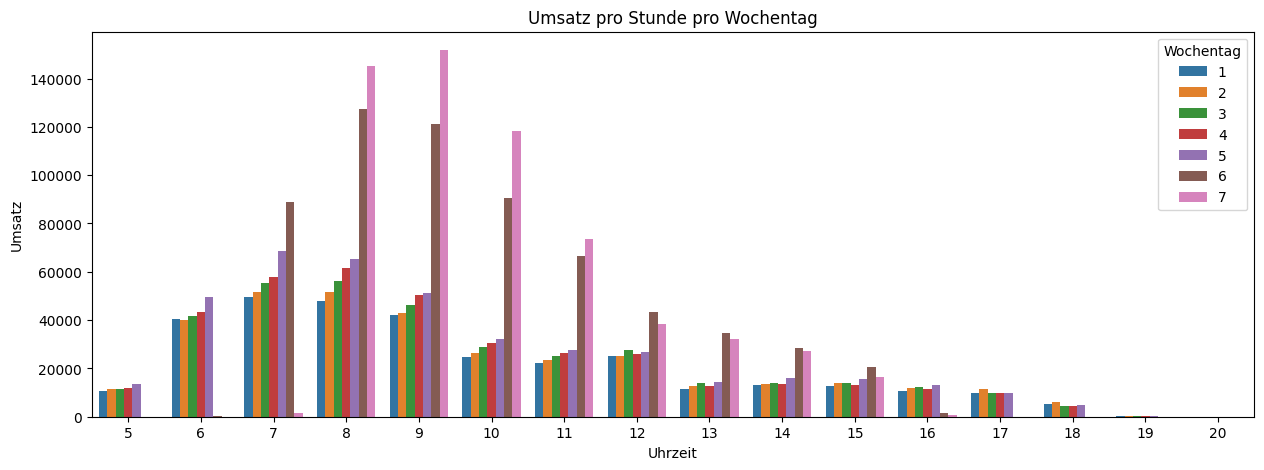

In [207]:
# Gruppieren der Daten nach Uhrzeit und Wochentag sowie Berechnung des durchschnittlichen Umsatzes
avg_umsatz = data.groupby(["Stunde", "Wochentag"])["Umsatz"].sum().reset_index()

#Erstellen des Plots
plt.figure(figsize = (15,5))
ax = sns.barplot(data=avg_umsatz, x="Stunde", y="Umsatz", hue="Wochentag")

# Beschriftung der Achsen
ax.set_xlabel("Uhrzeit")
ax.set_ylabel("Umsatz")
ax.set_title("Umsatz pro Stunde pro Wochentag")
ax.legend(title = "Wochentag", loc = "upper right")

# Graphen anzeigen
plt.savefig("Umsatz pro Stunde pro Wochentag.png", dpi = 300, bbox_inches = "tight")
plt.show()

Der Umsatz steigt sichtbar während der Woche an. Zudem sind die unterschiedlichen Öffnungszeiten unter der Woche und am Wochenenende klar erkennbar. Was ausserdem interessant ist, dass die Verkäufe konstant im Laufe der Woche zunehmen. Es gibt also deutliche unterschiede im Konusmverhalten der Kunden pro Wochentag. 

##### b. Entwicklng des Umsatzes über die Zeit

Als nächstes schauen wir uns den Umsatz der Filliale über die Jahre hinweg an. Dadurch wollen wir feststellen, ob es einen siginifikanten Unterschied im Konsumeverhalten vor, während, und nach der COVID-19-Pandemie gab. Sollte das Konsumverhalten nach der Pandemie ein anderes sein, wird es nötig sein, den Datensatz auf die Zeit danach zu beschränken, da ansonsten unser Forecast nicht repräsentativ ist.   

In [208]:
# Umstrukturieren des Datensatzes, wobei Umsatz auf Tagesbasis aggregiert wird 
data_umsatz_pro_tag = data.groupby(['Datum']).agg(Umsatz=('Umsatz',np.sum)).reset_index()
data_umsatz_pro_tag.head()

,Datum,Umsatz
0,2016-01-03,1175.5000
1,2016-01-04,795.1618
2,2016-01-05,512.7082
3,2016-01-06,654.0417
4,2016-01-07,751.9000


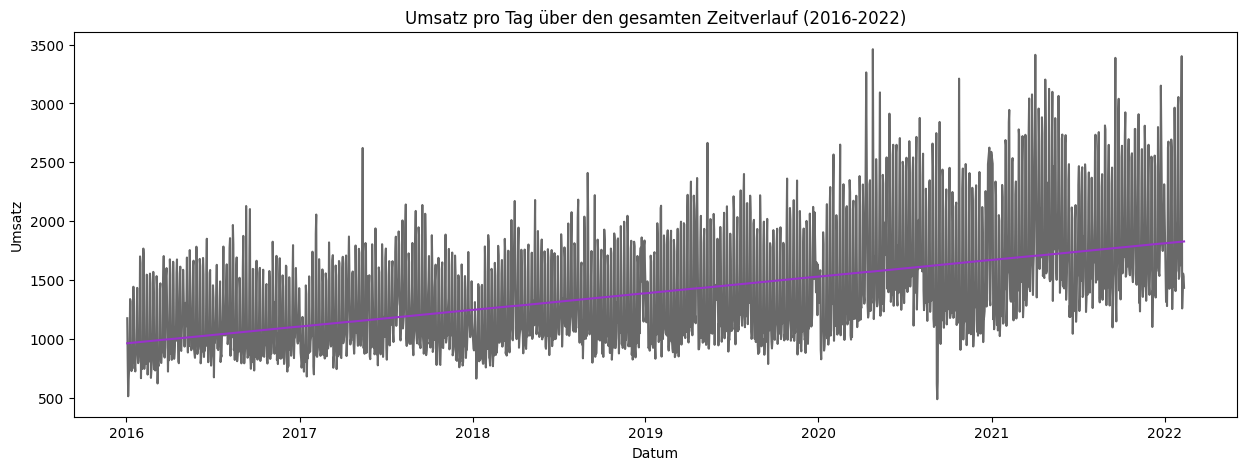

In [209]:
# Visualisierung: Umsatz pro Tag
plt.figure(figsize=(15,5))
plt.plot(data_umsatz_pro_tag['Datum'], data_umsatz_pro_tag['Umsatz'], color='dimgrey')
plt.xlabel('Datum')
plt.ylabel('Umsatz')
plt.title('Umsatz pro Tag über den gesamten Zeitverlauf (2016-2022)')

# Trendlinie
z = np.polyfit(data_umsatz_pro_tag.index, data_umsatz_pro_tag['Umsatz'], 1)
p = np.poly1d(z)
plt.plot(data_umsatz_pro_tag['Datum'], p(data_umsatz_pro_tag.index), label='Trendline', color='darkorchid')

# Graphen anzeigen 
plt.show()

Es zeigt sich ein gleichmässiges Wachstum des täglichen Umsatzes über die Jahre hinweg. Sichtbar ist, dass die Jahre vor Corona sehr homogen sind, und sich stark gleichen in den Verkaufszahlen. Auffällig wird dann die stärkeren Extrema während und nach der COVID-19-Pandemie. Insgesamt zeigt der Datensatz aber trotzdem immer einen ähnlichen Trend über das Jahr hinweg. Er ist lediglich ab der Corona-Zeit extremer geworden. 

##### c. Entwicklung der verkauften Menge pro Jahr

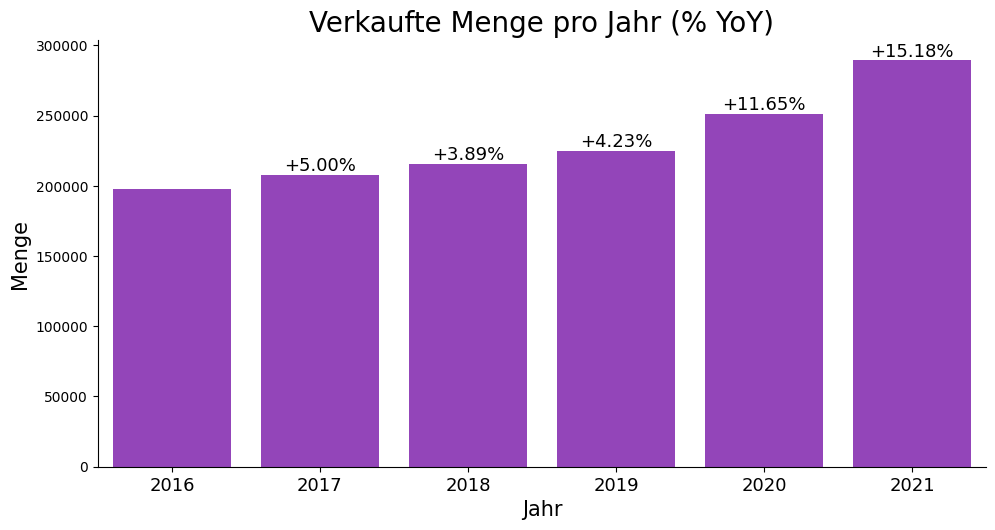

In [210]:
# Umstrukturieren des Datensatzes, wobei Menge auf Jahresbasis aggregiert wird 
data['Datum'] = pd.to_datetime(data['Datum'])
data_menge_pro_jahr = data.groupby(data.Datum.dt.year).agg(Menge=('Menge', np.sum)).reset_index()
data_menge_pro_jahr = data_menge_pro_jahr[data_menge_pro_jahr['Datum'] != 2022]

# Berechnung der jährlichen, prozentualen Veränderung der Verkaufsmenge 
data_menge_pro_jahr['YoY'] = data_menge_pro_jahr['Menge'].pct_change() * 100

plt_jahr = sns.catplot(kind='bar', data=data_menge_pro_jahr, x='Datum', y='Menge', 
                       height=5, aspect=2, color='darkorchid')

# Beschriften der Achsen und Hinzufügen des Titels
plt.title('Verkaufte Menge pro Jahr (% YoY)', size=20)
plt.xticks(size=13)
plt.xlabel('Jahr', size=15)
plt.ylabel('Menge', size=15)

# Beschriftung der Balken mit der jährlichen, prozentualen Veränderung der Verkaufsmenge
ax = plt.gca()
for p, yoy in zip(ax.patches, data_menge_pro_jahr['YoY']):
    if not np.isnan(yoy):
        ax.annotate(f'{yoy:+.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', size=13, color='black')

# Graphen anzeigen
plt.savefig('Verkaufte Menge pro Jahr (% YoY).png', dpi=300, bbox_inches='tight')

plt.show()

In den jährlichen Summen kann man ebenfalls einen kontinuierlichen Verkaufsanstieg sehen. 

### 2.2 Produktanalyse

##### a. Verkaufsmenge pro Produkt

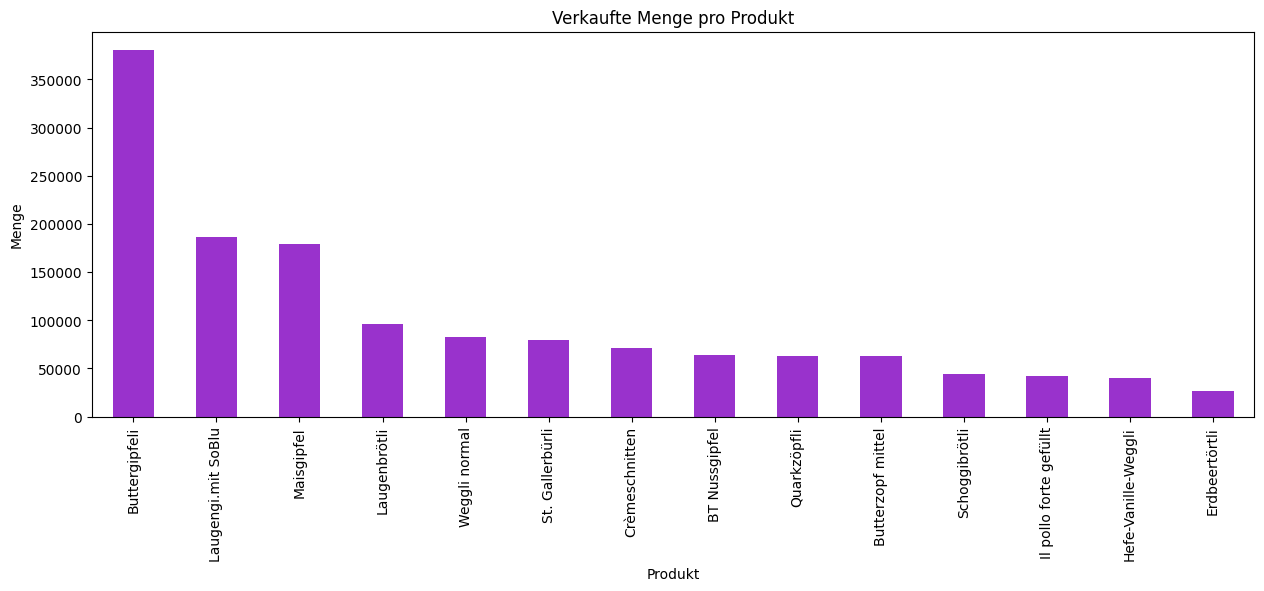

In [211]:
# Umstrukturieren des Datensatzes, wobei Menge auf Jahresbasis aggregiert wird 
data_menge_pro_produkt = data.groupby('Artikel')['Menge'].sum()

# Sortieren der Daten
data_menge_pro_produkt = data_menge_pro_produkt.sort_values(ascending=False)

# Visualisierung der Daten
plt.figure(figsize=(15, 5)) 
data_menge_pro_produkt.plot(kind='bar', color='darkorchid')
plt.xlabel('Produkt')
plt.ylabel('Menge')
plt.title('Verkaufte Menge pro Produkt')
plt.xticks(rotation=90)  

# Graphen anzeigen
plt.show()

##### b. Umsatz pro Produkt pro Jahr

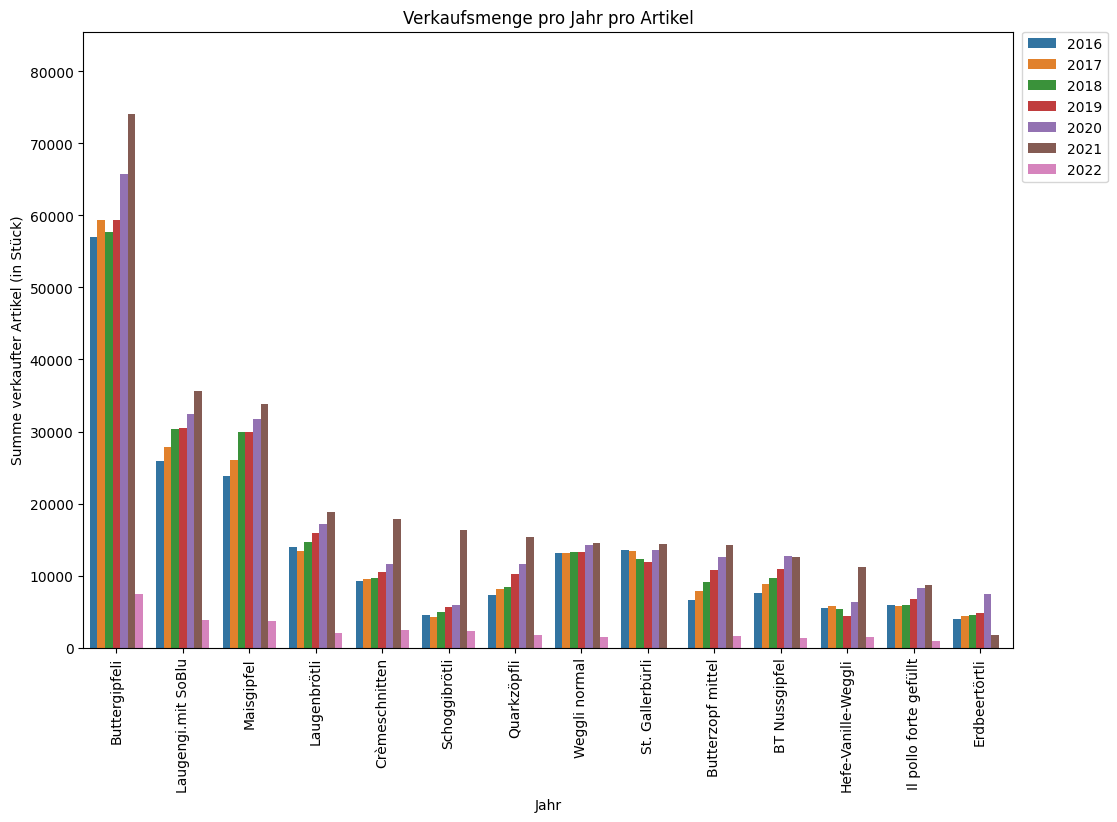

In [212]:
# Gruppieren der Daten, wobei Artikel auf Jahresbasis aggregiert wird 
data_menge_pro_artikel_jahr = data.groupby(['Artikel', data['Datum'].dt.year])['Menge'].sum()

# Konvertieren der gruppierten Daten im Datensatz
aggr_data_menge_pro_artikel_jahr = data_menge_pro_artikel_jahr.reset_index(name='verkaufte_menge')

sortiert_aggr_data_menge_pro_artikel_jahr = aggr_data_menge_pro_artikel_jahr.sort_values(by='verkaufte_menge', ascending=False)
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='Artikel', y='verkaufte_menge', hue='Datum', data=sortiert_aggr_data_menge_pro_artikel_jahr)
ax.set(title='Verkaufsmenge pro Jahr pro Artikel', ylabel='Summe verkaufter Artikel (in Stück)')
ax.set_xlabel('Jahr')
ax.set_ylabel('Summe verkaufter Artikel (in Stück)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylim([0, ax.get_ylim()[1]*1.1]) 
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

# Graphen anzeigen
plt.show()

##### c. ABC-Analyse 

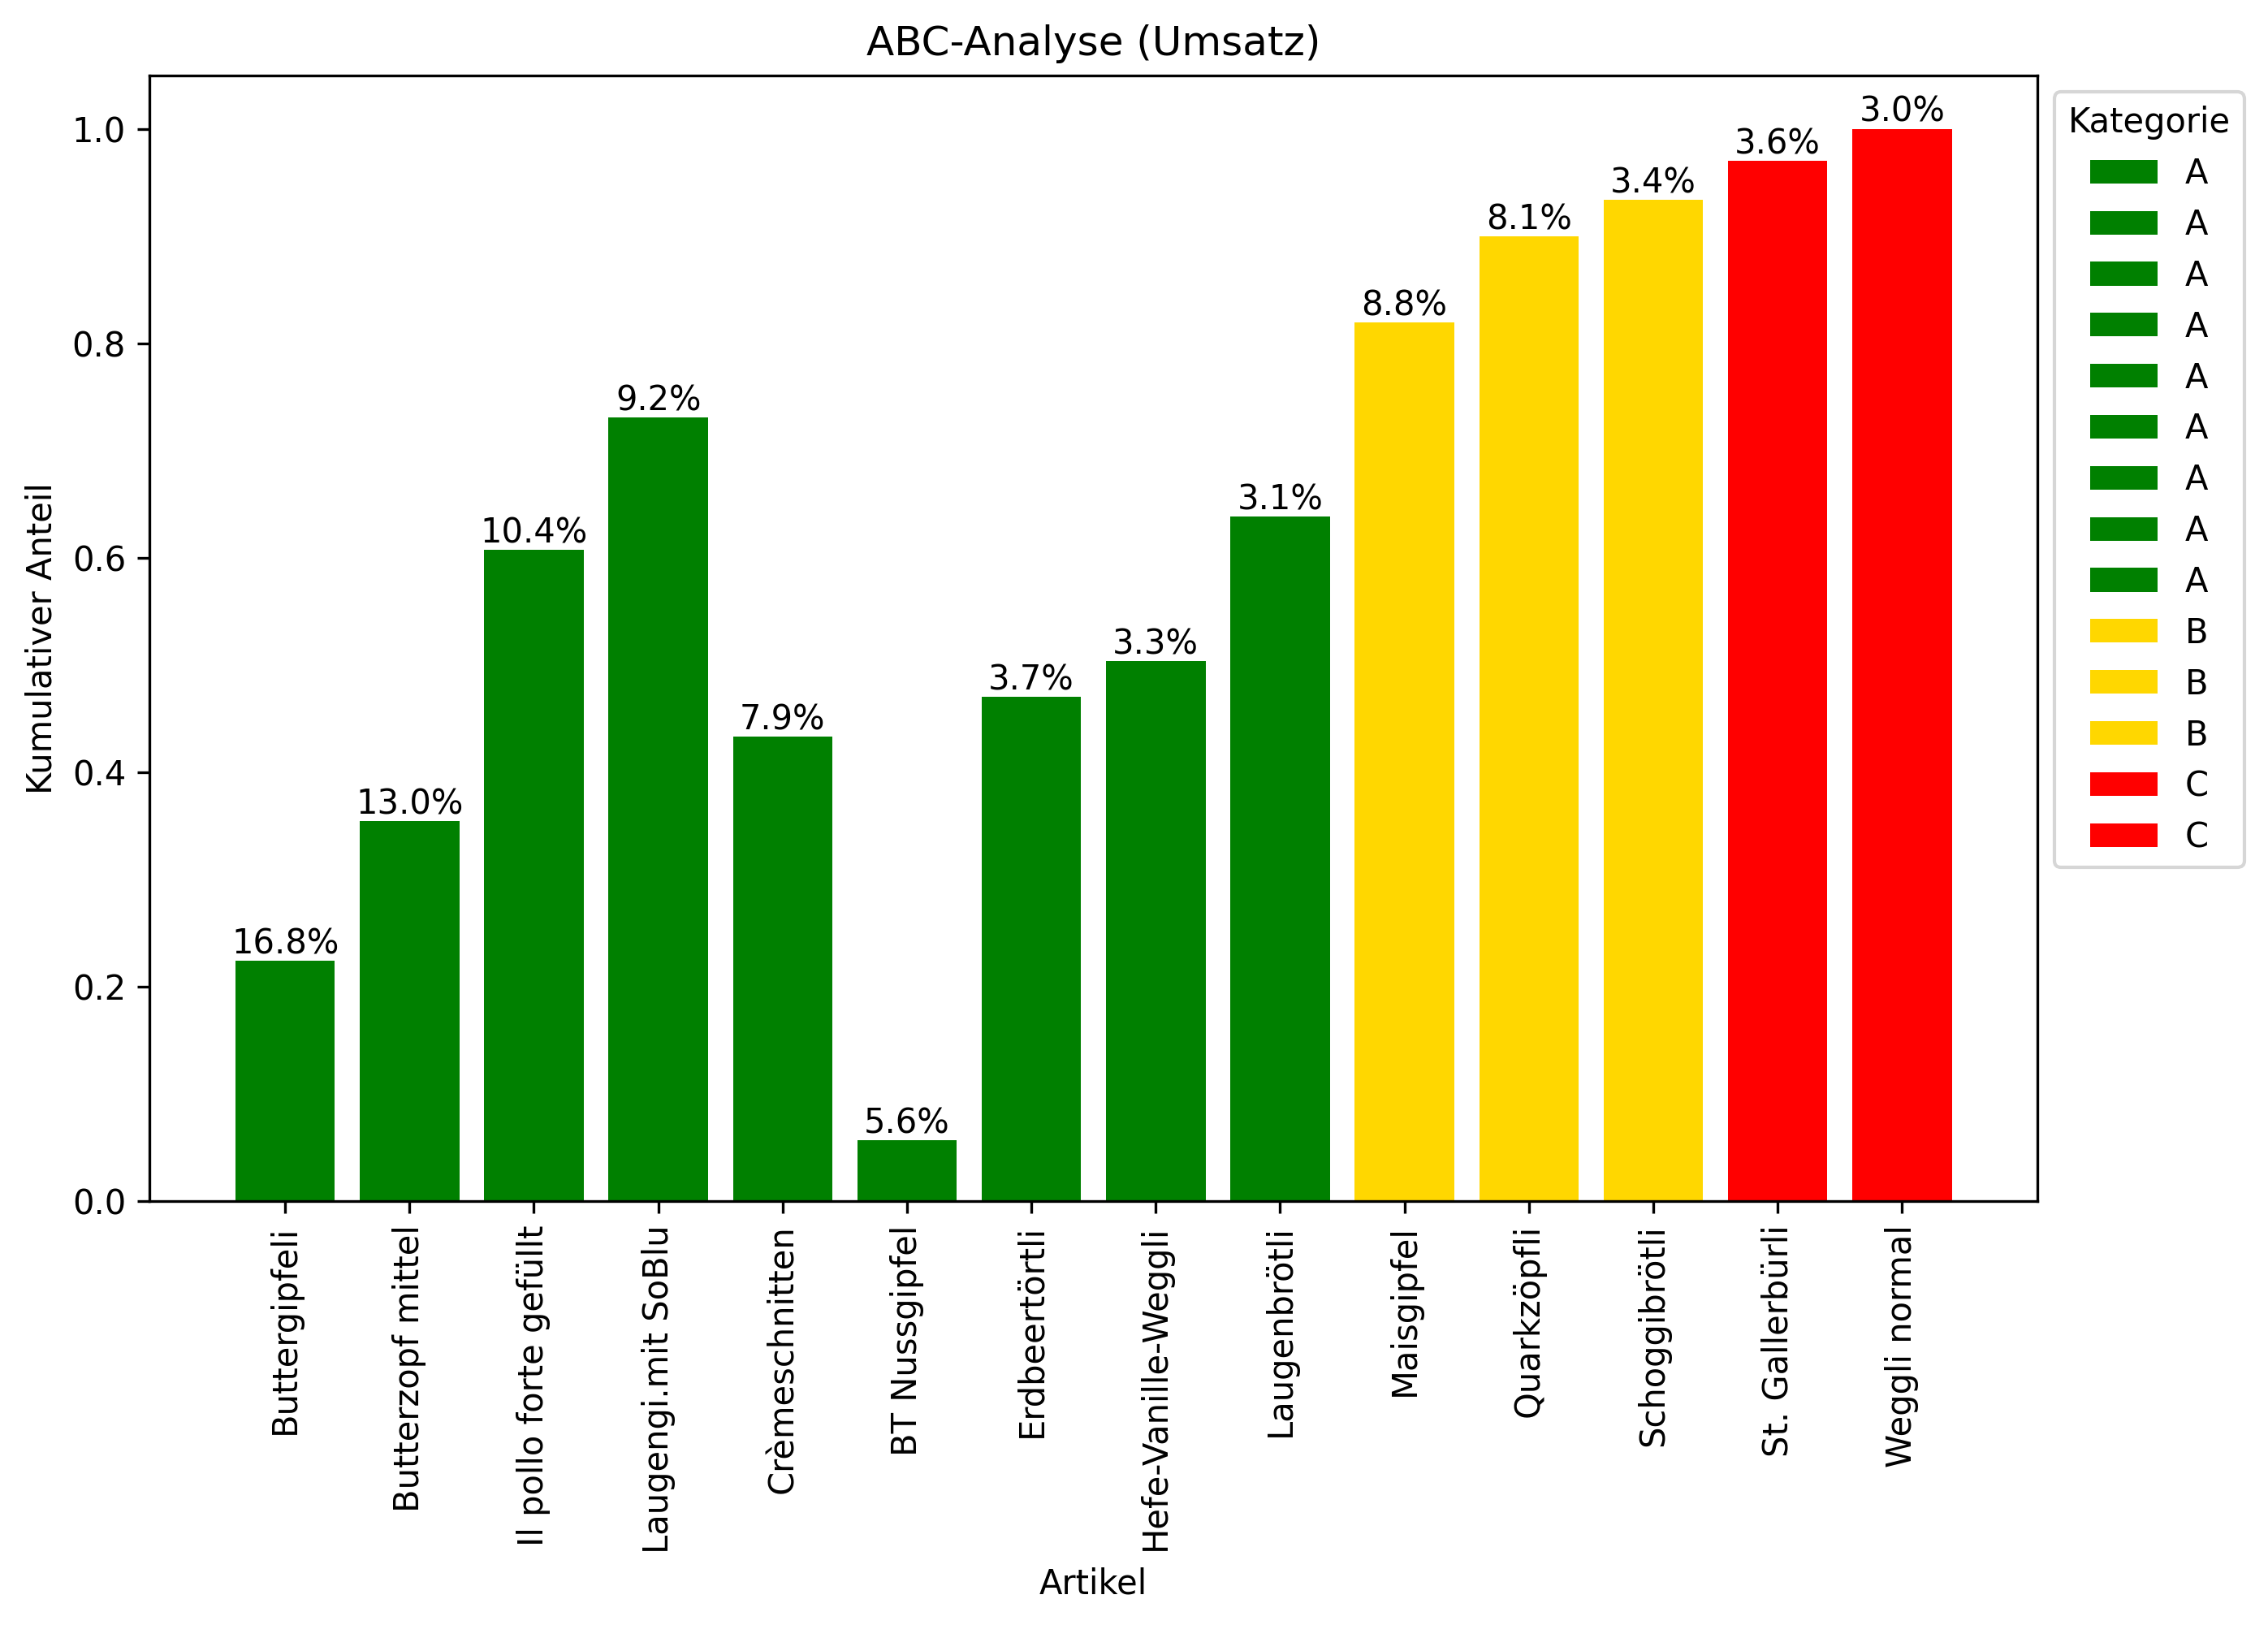

In [213]:
# Gruppieren der Daten
data_abc_manual = data.groupby(['Artikel']).agg(Menge=('Menge',np.sum),Umsatz=('Umsatz',np.sum)).reset_index()
data_abc_manual

# Berechnen des aggregierten Umsatzes und Prozentsatzes
data_abc_manual['Kumulativer_Umsatz'] = data_abc_manual['Umsatz'].cumsum()
gesamtumsatz = data_abc_manual['Umsatz'].sum()
data_abc_manual['Kumulativer_Anteil'] = (data_abc_manual['Kumulativer_Umsatz'] / gesamtumsatz)
data_abc_manual['Anteil'] = data_abc_manual['Umsatz'] / gesamtumsatz

# Definieren der ABC-Kategorien
def abc_klassifizierung(anteil):
    if anteil <= 0.80:
        return 'A'
    elif anteil <= 0.95:
        return 'B'
    else:
        return 'C'

# Hinzufügen der Kategorien zum DataFrame
data_abc_manual['Kategorie'] = data_abc_manual['Kumulativer_Anteil'].apply(abc_klassifizierung)

# Sortieren des DataFrames nach Umsatz und Kategorie
data_abc_manual = data_abc_manual.sort_values(by=['Kategorie', 'Umsatz'], ascending=[True, False])

# Visualisieren der ABC-Analyse
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
balken = ax.bar(data_abc_manual['Artikel'], data_abc_manual['Kumulativer_Anteil'],
                color=['green' if k == 'A' else 'gold' if k == 'B' else 'red' for k in data_abc_manual['Kategorie']])
ax.set_ylabel('Kumulativer Anteil')
ax.set_xlabel('Artikel')
ax.set_title('ABC-Analyse (Umsatz)')
ax.legend(balken, data_abc_manual['Kategorie'], title='Kategorie', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)

# Prozentwerte über den Balken anzeigen
for balken, anteil in zip(balken, data_abc_manual['Anteil']):
    höhe = balken.get_height()
    ax.text(balken.get_x() + balken.get_width() / 2, höhe, '{:.1%}'.format(anteil), ha='center', va='bottom')

# Diagramm exportieren
plt.savefig('ABC-Analyse (Umsatz)', dpi=500, bbox_inches='tight')
plt.show()


##### d. Umsatzstärkste Produkte und ihre Umsatzentwicklung

In [214]:
# Placeholder

##### e. Preisentwicklung Buttergipfeli

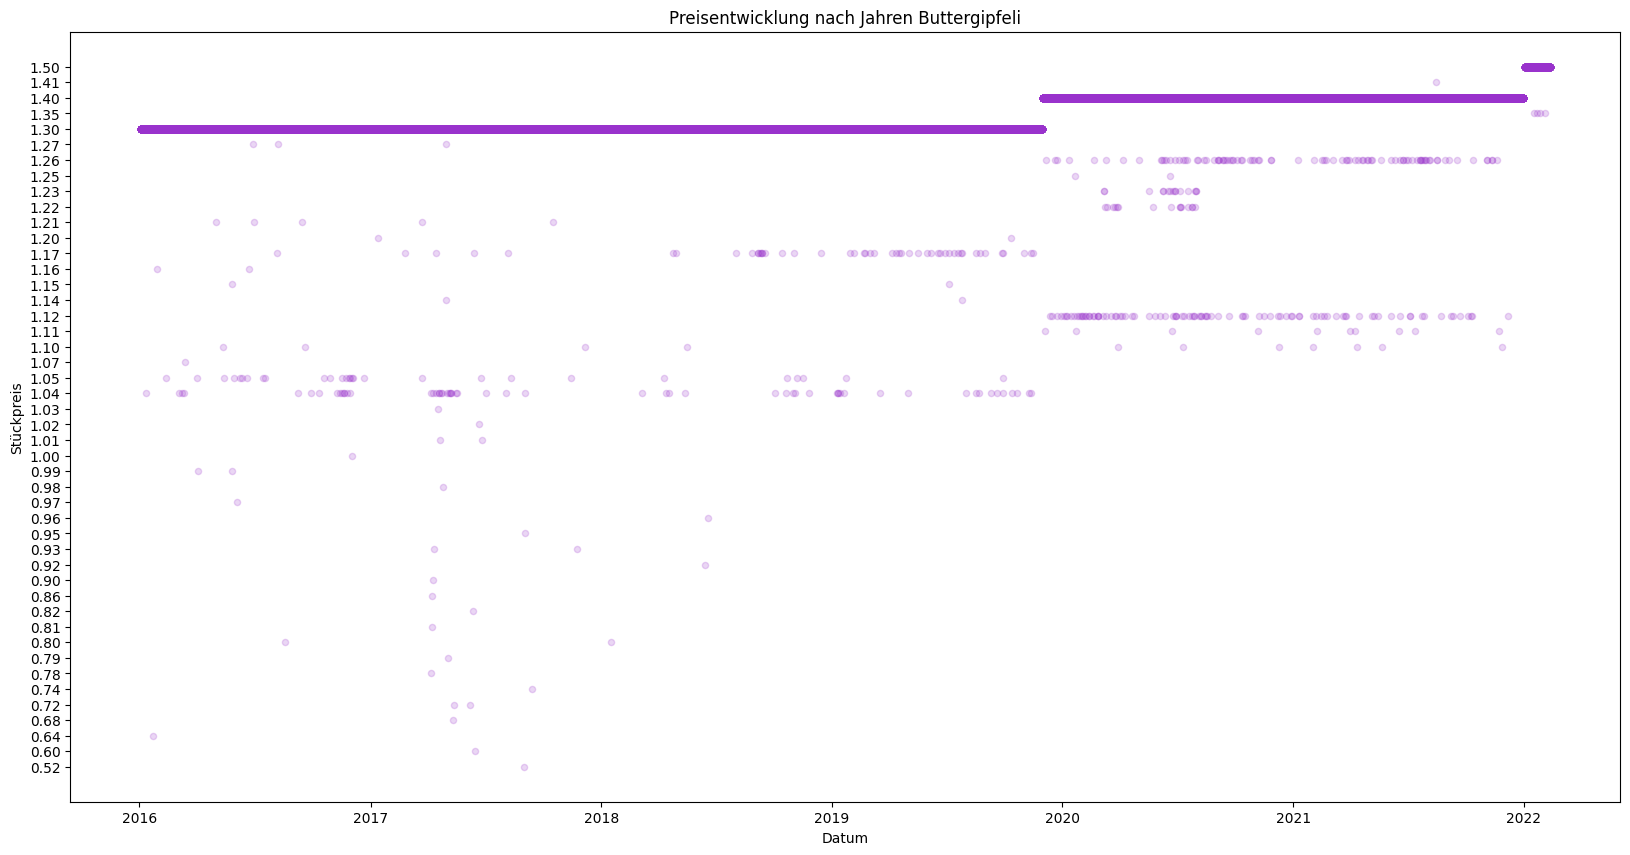

In [215]:
# Plot mit Preisentwicklung von BT Nussgipfeln über die Jahre
data_preis.loc[data["Artikel"] == "Buttergipfeli"].plot(kind='scatter', x='Datum', y='Stückpreis', alpha=0.2, figsize=(20,10), color='darkorchid', title='Preisentwicklung nach Jahren Buttergipfeli')

# Graphen anzeigen
plt.savefig('Preisentwicklung nach Jahren Buttergipfeli.png', dpi=500, bbox_inches='tight')

Hier sind ganz klar Preiserhöhungen und mögliche Rabatte sichtbar. 

##### e. Entwicklung Verkaufs- und Bestellmenge

Anzahl Buttergipfeli bestellt am 12.04.2021: 85.0
Total Anzahl Buttergipfeli verkauft am 12.04.2021: 170.0


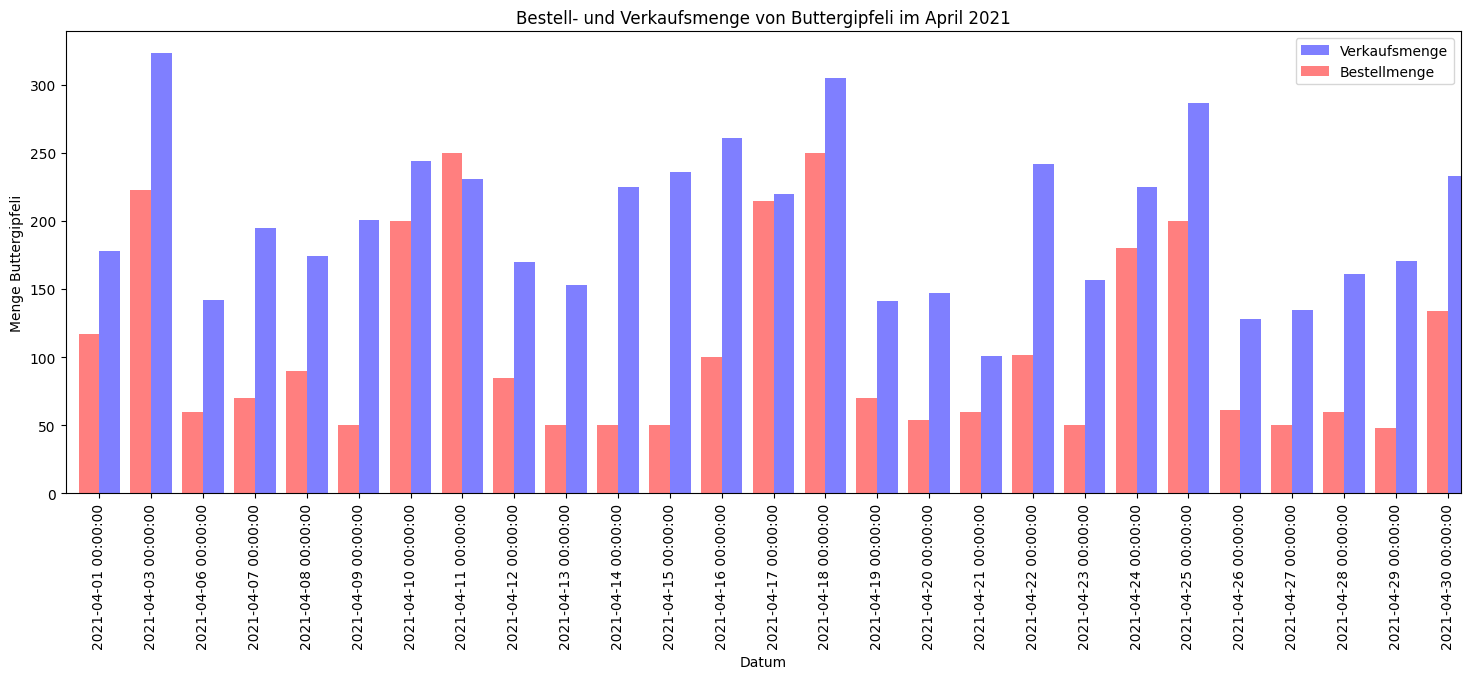

In [216]:
# Umwandeln der Spalte "Datum" in datetime 
data['Datum'] = pd.to_datetime(data['Datum'], format='%Y-%m-%d')

# Filtern der Daten des Buttergipfeli nach 12.04.2021 
buttergipfeli_data_nach_12042021 = data[(data['Artikel'] == 'Buttergipfeli') & (data['Datum'] == '2021-04-12')]

# Ausgeben des ersten Bestelleintrags von Bestellungen
buttergipfeli_bestellt_12042021 = buttergipfeli_data_nach_12042021['Bestellungen'].iloc[0]

# Ausgeben der Gesamtmenge von Buttergipfeli 
buttergipfeli_verkauft_12042021 = buttergipfeli_data_nach_12042021['Menge'].sum()

# Visualisieren der Daten
print(f"Anzahl Buttergipfeli bestellt am 12.04.2021: {buttergipfeli_bestellt_12042021}")
print(f"Total Anzahl Buttergipfeli verkauft am 12.04.2021: {buttergipfeli_verkauft_12042021}")

# Umwandeln der Spalte "Datum" in datetime 
data['Datum'] = pd.to_datetime(data['Datum'], format='%Y-%m-%d')

# Filtern der Daten nach April 2021
start_date = '2021-04-01'
end_date = '2021-04-30'
april_data = data[(data['Datum'] >= start_date) & (data['Datum'] <= end_date)]

# Ausgabe Anzahl Bestellungen und Verkaufsmenge von Buttergipfeli 
sales_by_day = april_data[april_data['Artikel'] == 'Buttergipfeli'].groupby('Datum')['Menge'].sum()
orders_by_day = april_data[april_data['Artikel'] == 'Buttergipfeli'].groupby('Datum')['Bestellungen'].mean()

# Visualisieren der Daten
fig, ax = plt.subplots(figsize=(18, 6))
sales_by_day.plot(kind='bar', ax=ax, color='blue', alpha=0.5, width=0.4, position=0, label='Verkaufsmenge')
orders_by_day.plot(kind='bar', ax=ax, color='red', alpha=0.5, width=0.4, position=1, label='Bestellmenge')

# Beschriften der Achsen und Hinzufügen des Titels 
ax.set_xlabel('Datum')
ax.set_ylabel('Menge Buttergipfeli')
ax.set_title('Bestell- und Verkaufsmenge von Buttergipfeli im April 2021')

# Diagramm exportieren
plt.legend()
plt.show()

##### f. Korrelationsmatrix

In [217]:
# Berechnen einer Korrelationsmatrix für den Datensatz data und speichern in Variable corr
corr = data.corr()

# Definieren einer Farbpalette für die Korrelationsmatrix
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap).format(precision=2)

C:\Users\marin\AppData\Local\Temp\ipykernel_13220\3178225664.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Stunde,Monat
Menge,1.00,0.73,0.11,-0.00,0.00,0.00,0.00,-0.10,0.00
Umsatz,0.73,1.00,-0.04,-0.00,0.00,0.00,0.01,0.05,-0.01
Bestellungen,0.11,-0.04,1.00,0.00,-0.04,0.01,-0.08,-0.11,0.06
Niederschlag,-0.00,-0.00,0.00,1.00,-0.00,0.46,-0.14,0.02,0.00
Temperatur Schnitt Tag,0.00,0.00,-0.04,-0.00,1.00,0.08,0.74,-0.03,0.17
Niederschlag Summe Tag,0.00,0.00,0.01,0.46,0.08,1.00,-0.19,0.00,0.00
Globalstrahlung Schnitt Tag,0.00,0.01,-0.08,-0.14,0.74,-0.19,1.00,-0.03,-0.13
Stunde,-0.10,0.05,-0.11,0.02,-0.03,0.00,-0.03,1.00,-0.01
Monat,0.00,-0.01,0.06,0.00,0.17,0.00,-0.13,-0.01,1.00


# 3.0 Erweiterung des Datensatzes

### 3.1 Feiertage Kanton TG

- Quelle: https://www.feiertagskalender.ch/index.php?geo=2173&jahr=2016&klasse=5&hl=de

#### a. Feiertage aus Liste_Feiertage.csv einlesen

In [218]:
# CSV-Datei in ein Pandas DataFrame einlesen
feiertage_df = pd.read_csv('Liste_Feiertage.csv', delimiter=';')

# Die Spalte "Datum" ins Datumsformat konvertieren
feiertage_df['Datum'] = pd.to_datetime(feiertage_df['Datum'], format='%d.%m.%Y')

# Die Spalte "Datum" umbenennen, um sie mit der Spalte "Datum" im Data DataFrame abzugleichen
feiertage_df = feiertage_df.rename(columns={'Datum': 'Feiertag_Datum', 'Feiertag': 'Feiertag Name'})

# Die Spalte "Datum" im Data DataFrame ins Datumsformat konvertieren
data['Datum'] = pd.to_datetime(data['Datum'])

# Die Dataframes "data" und "feiertage_df" anhand des Datums zusammenführen
data = data.merge(feiertage_df[['Feiertag_Datum', 'Feiertag Name']], left_on='Datum', right_on='Feiertag_Datum', how='left')

# Fehlende Werte in der Spalte 'Feiertag Name' mit 'normaler Tag' füllen
data['Feiertag Name'] = data['Feiertag Name'].fillna('normaler Tag')

# Die unnötige Spalte 'Feiertag_Datum' entfernen
data = data.drop(columns='Feiertag_Datum')

# Die ersten 5 Zeilen des Dataframes ausgeben
data.head()


,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1,6.00,normaler Tag
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1,1.30,normaler Tag
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1,1.30,normaler Tag
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,6.00,normaler Tag
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,1.30,normaler Tag


In [219]:
# Hinzufügen einer neuen Spalte im Datensatz inkl. Dummy-Variable, wenn Tag einem Feiertag entspricht (1) oder nicht (0).

#data['Feiertag'] = ''

# Erstellung der Dummy-Variable

#for index, row in data.iterrows():
 #   if row['Datum'].strftime('%Y-%m-%d') in holiday_dates:
   #     data.at[index, 'Feiertag'] = 1
  #  else:
    #    data.at[index, 'Feiertag'] = 0

#data.head()

In [220]:
# Nun soll dem Datensatz eine weitere Spalte "Feiertag Name" eingefügt werden

#data['Feiertag Name'] = ''

#If the date is in the list of holiday dates, then fill this new column with the name of the holiday from the feiertage_df dataframe

#for index, row in data.iterrows():
 #   if row['Datum'].strftime('%Y-%m-%d') in holiday_dates:
  #      data.at[index, 'Feiertag Name'] = feiertage_df.loc[feiertage_df['Datum'] == row['Datum'].strftime('%Y-%m-%d'), 'Feiertag'].values[0]
   # else:
    #    data.at[index, 'Feiertag Name'] = 'normaler Tag'

# Print the first 5 rows of the dataframe
#data.head()

#### b. Eine neue Spalte 'offen TG_geschlossen SG' wird hinzugefügt. Gemäss Angaben der Filialleiterin von Sulgen, Romina, verkaufen sie in Sulgen mehr Backwaren an Tagen, an denen im Thurgau kein Feiertag ist, während in St. Gallen ein Feiertag ist und die Läden geschlossen sind

In [221]:
# Hinzufügen einer neuen Spalte, die am Allerheiligen den Wert 1 hat
data['offen_TG_geschlossenSG'] = data['Feiertag Name'].apply(lambda x: 1 if x == 'Allerheiligen' else 0)

# Anzeigen des Datensatzes
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name,offen_TG_geschlossenSG
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1,6.00,normaler Tag,0
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1,1.30,normaler Tag,0
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1,1.30,normaler Tag,0
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,6.00,normaler Tag,0
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,1.30,normaler Tag,0


In [222]:
# Testen, ob der 2021-11-01 als Wert in der Spalte offen_TG_geschlossenSG angezeigt wird
testwert_offen_TG_geschlossenSG = data.loc[data['Datum'] == '2021-11-01', 'offen_TG_geschlossenSG'].values[0]

# Test Wert anzeigen
if testwert_offen_TG_geschlossenSG == 1:
    print("Der 01.11.2021 ist ein Feiertag im Kanton SG, im Kanton TG nicht")
else:
    print("Etwas hat nicht geklappt, kontrolliere den Feiertag Allerheiligen nochmals")


Der 01.11.2021 ist ein Feiertag im Kanton SG, im Kanton TG nicht


#### c. Visualisierungen für Feiertage im Kanton TG

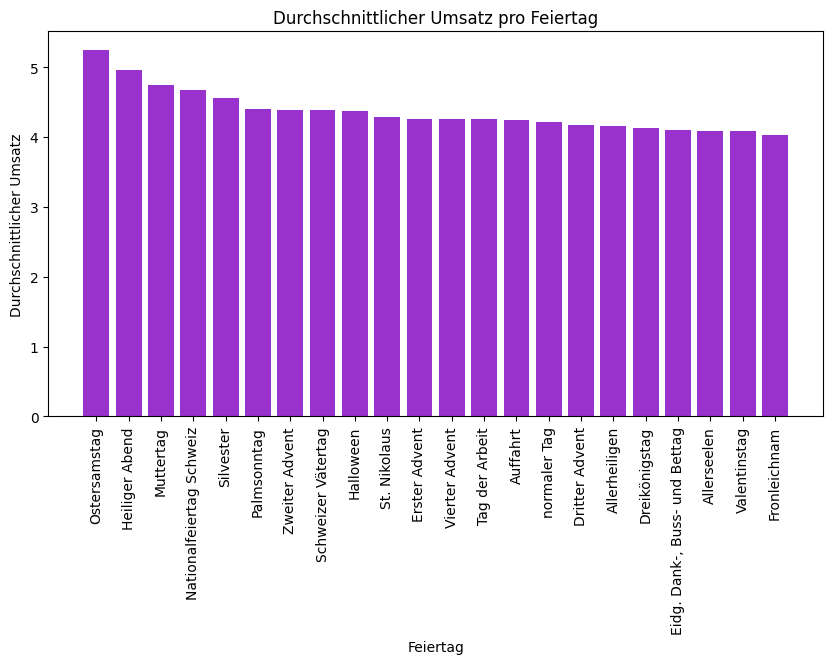

In [223]:
#Erstellen eines Plots für den durchschnittlichen Umsatz pro Feiertag

plt.figure(figsize= (10, 5))
plt.bar(data.groupby("Feiertag Name")["Umsatz"].mean().sort_values(ascending = False).index, data.groupby("Feiertag Name")["Umsatz"].mean().sort_values(ascending = False), color = 'darkorchid')
plt.title("Durchschnittlicher Umsatz pro Feiertag")
plt.xlabel("Feiertag")
plt.ylabel("Durchschnittlicher Umsatz")
plt.xticks(rotation = 90)

# Diagramm anzeigen
plt.show()

Wie bereits von Roger Mohn entnommen, zeigt das Diagramm deutlich auf, dass Ostern der verkaufsstärkste Feiertag ist. 

In [224]:
# Die Informationen aus dem Diagramm 'Feiertag' in einer Tabelle ausgeben
data.groupby("Feiertag Name")["Umsatz"].mean().sort_values(ascending = False).reset_index()

,Feiertag Name,Umsatz
0,Ostersamstag,5.248667
1,Heiliger Abend,4.957025
2,Muttertag,4.742045
3,Nationalfeiertag Schweiz,4.676658
4,Silvester,4.561564
5,Palmsonntag,4.394883
6,Zweiter Advent,4.394153
7,Schweizer Vätertag,4.389930
8,Halloween,4.376063
9,St. Nikolaus,4.291889


In [225]:
# Einen neuen, leeren Datensatz namens 'data_vor_feiertag' erstellen
data_vor_feiertag = pd.DataFrame()

# dem Datensatz data_vor_feiertag die Spalten 'Datum' und 'Vortag von' zuweisen
data_vor_feiertag["Datum"] = ""
data_vor_feiertag["Vortag von"] = ""

# Die Spalte 'Datum' wird in Datentyp "datetime" konvertieren
data_vor_feiertag["Datum"] = pd.to_datetime(data_vor_feiertag["Datum"]).dt.date

# Für die Spalte 'Datum' im Datensatz "data_vor_feiertag" soll der Vortag von jedem Feiertag aus dem feiertage_df eingetragen werden
i = len(feiertage_df)

while i > 0:
    data_vor_feiertag.at[i-1, "Datum"] = feiertage_df.at[i-1, "Feiertag_Datum"] - pd.Timedelta(days=1)
    data_vor_feiertag.at[i-1, "Vortag von"] = feiertage_df.at[i-1, "Feiertag Name"]
    i = i - 1

# Die Daten zum Format YYYY-MM-DD konvertieren
data_vor_feiertag["Datum"] = pd.to_datetime(data_vor_feiertag["Datum"]).dt.strftime('%Y-%m-%d')

# In jeden Eintrag mit "Vortag von" soll der Wert 'Vortag' beigefügt werden vor dem Feiertag
data_vor_feiertag["Vortag von"] = data_vor_feiertag["Vortag von"].apply(lambda x: "Vortag " + x)

# Liste aus den Daten 'Datum' erstellen
datum_dates = data_vor_feiertag['Datum'].tolist()

# Datensatz data_vor_feiertag anzeigen
data_vor_feiertag.head()

,Datum,Vortag von
181,2022-02-13,Vortag Valentinstag
180,2022-01-05,Vortag Dreikönigstag
179,2022-01-01,Vortag Berchtoldstag
178,2021-12-31,Vortag Neujahrstag
177,2021-12-30,Vortag Silvester


In [226]:
# Nun soll dem Datensatz eine weitere Spalte 'Vorfeiertag' eingefügt werden
data['Vortag von'] = ''

# Wenn das Datum in der Liste der Feiertage enthalten ist, fülle diese neue Spalte mit dem Namen des Feiertags aus dem feiertage_df Datensatz
for index, row in data.iterrows():
    if row['Datum'].strftime('%Y-%m-%d') in datum_dates:
        data.at[index, 'Vortag von'] = data_vor_feiertag.loc[data_vor_feiertag['Datum'] == row['Datum'].strftime('%Y-%m-%d'), 'Vortag von'].values[0]
    else:
        data.at[index, 'Vortag von'] = 'normaler Tag'

# Datensatz data anzeigen
data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name,offen_TG_geschlossenSG,Vortag von
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1,6.00,normaler Tag,0,normaler Tag
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1,1.30,normaler Tag,0,normaler Tag
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1,1.30,normaler Tag,0,normaler Tag
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,6.00,normaler Tag,0,normaler Tag
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,1.30,normaler Tag,0,normaler Tag


### 3.2 Ferienzeit Kanton TG

#### a. Prüfen, wann der Datensatz beginnt und endet, um Ferienzeit während der gesamten Zeit zu bestimmen. 

In [227]:
# Erstes Datum bzw. Eintrag im df data finden
erstes_datum = data['Datum'].min()

# Letztes Datum bzw. Eintrag im df data finden
letztes_datum = data['Datum'].max()

# Ausgeben des ersten und letzten Datums im df data
print("Das erste Datum im Datensatz ist:", erstes_datum)
print("Das letzte Datum im Datensatz ist:", letztes_datum)

Das erste Datum im Datensatz ist: 2016-01-03 00:00:00
Das letzte Datum im Datensatz ist: 2022-02-11 00:00:00


In [228]:
# Leere Listen für die jeweiligen Ferien im Kanton TG eröffnen
gesamtliste_herbstferien = []
gesamtliste_weihnachtsferien = []
gesamtliste_sportferien = []
gesamtliste_fruehlingsferien = []
gesamtliste_pfingstferien = []
gesamtliste_sommerferien = []


#### b. Die Ferien aus dem Kanton TG haben wir aus folgenden Quellen entnommen:

- Quelle: https://av.tg.ch/public/upload/assets/8713/10_Jahresplan_Schulferien_Volksschule_2019_-_2029.pdf?fp=3
- Quelle: https://www.schulferien.org/schweiz/kalender/thurgau/2019/


Schuljahr 2015/2016

In [229]:
import datetime

# Herbstferien Schuljahr 2015 / 2016
# brauchen wir nicht

# Weihnachtsferien Schuljahr 2015 / 2016
ferienbeginn_weihnachten2015_2016 = datetime.date(2015, 12, 24)
ferienende_weihnachten2015_2016 = datetime.date(2016, 1, 3)

current_date = ferienbeginn_weihnachten2015_2016
weihnachtsferien_tg_sj_2015_2016 = []

while current_date <= ferienende_weihnachten2015_2016:
    weihnachtsferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2015 / 2016
ferienbeginn_sport2015_2016 = datetime.date(2016, 2, 1)
ferienende_sport2015_2016 = datetime.date(2016, 2, 7)

current_date = ferienbeginn_sport2015_2016
sportferien_tg_sj_2015_2016 = []

while current_date <= ferienende_sport2015_2016:
    sportferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2015 / 2016
ferienbeginn_fruehling2015_2016 = datetime.date(2016, 3, 25)
ferienende_fruehling2015_2016 = datetime.date(2016, 4, 10)

current_date = ferienbeginn_fruehling2015_2016
fruehlingsferien_tg_sj_2015_2016 = []

while current_date <= ferienende_fruehling2015_2016:
    fruehlingsferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2015 / 2016
ferienbeginn_pfingsten2015_2016 = datetime.date(2016, 5, 5)
ferienende_pfingsten2015_2016 = datetime.date(2016, 5, 16)

current_date = ferienbeginn_pfingsten2015_2016
pfingstferien_tg_sj_2015_2016 = []

while current_date <= ferienende_pfingsten2015_2016:
    pfingstferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2015 / 2016
ferienbeginn_sommer2015_2016 = datetime.date(2016, 7, 11)
ferienende_sommer2015_2016 = datetime.date(2016, 8, 14)

current_date = ferienbeginn_sommer2015_2016
sommerferien_tg_sj_2015_2016 = []

while current_date <= ferienende_sommer2015_2016:
    sommerferien_tg_sj_2015_2016.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)


gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2015_2016)
gesamtliste_sportferien.extend(sportferien_tg_sj_2015_2016)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2015_2016)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2015_2016)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2015_2016)

Schuljahr 2016/2017

In [230]:
# Herbstferien Schuljahr 2016 / 2017
ferienbeginn_herbst2016_2017 = datetime.date(2016, 10, 10)
ferienende_herbst2016_2017 = datetime.date(2016, 10, 23)

current_date = ferienbeginn_herbst2016_2017
herbstferien_tg_sj_2016_2017 = []

while current_date <= ferienende_herbst2016_2017:
    herbstferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2016 / 2017
ferienbeginn_weihnachten2016_2017 = datetime.date(2016, 12, 26)
ferienende_weihnachten2016_2017 = datetime.date(2017, 1, 8)

current_date = ferienbeginn_weihnachten2016_2017
weihnachtsferien_tg_sj_2016_2017 = []

while current_date <= ferienende_weihnachten2016_2017:
    weihnachtsferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2016 / 2017
ferienbeginn_sport2016_2017 = datetime.date(2017, 1, 30)
ferienende_sport2016_2017 = datetime.date(2017, 2, 5)

current_date = ferienbeginn_sport2016_2017
sportferien_tg_sj_2016_2017 = []

while current_date <= ferienende_sport2016_2017:
    sportferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2016 / 2017
ferienbeginn_fruehling2016_2017 = datetime.date(2017, 4, 3)
ferienende_fruehling2016_2017 = datetime.date(2017, 4, 17)

current_date = ferienbeginn_fruehling2016_2017
fruehlingsferien_tg_sj_2016_2017 = []

while current_date <= ferienende_fruehling2016_2017:
    fruehlingsferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2016 / 2017
ferienbeginn_pfingsten2016_2017 = datetime.date(2017, 5, 25)
ferienende_pfingsten2016_2017 = datetime.date(2017, 6, 5)

current_date = ferienbeginn_pfingsten2016_2017
pfingstferien_tg_sj_2016_2017 = []

while current_date <= ferienende_pfingsten2016_2017:
    pfingstferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2016 / 2017
ferienbeginn_sommer2016_2017 = datetime.date(2017, 7, 10)
ferienende_sommer2016_2017 = datetime.date(2017, 8, 13)

current_date = ferienbeginn_sommer2016_2017
sommerferien_tg_sj_2016_2017 = []

while current_date <= ferienende_sommer2016_2017:
    sommerferien_tg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2016_2017)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2016_2017)
gesamtliste_sportferien.extend(sportferien_tg_sj_2016_2017)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2016_2017)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2016_2017)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2016_2017)

Schuljahr 2017/2018

In [231]:
# Herbstferien Schuljahr 2017 / 2018
ferienbeginn_herbst2017_2018 = datetime.date(2017, 10, 9)
ferienende_herbst2017_2018 = datetime.date(2017, 10, 22)

current_date = ferienbeginn_herbst2017_2018
herbstferien_tg_sj_2017_2018 = []

while current_date <= ferienende_herbst2017_2018:
    herbstferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2017 / 2018
ferienbeginn_weihnachten2017_2018 = datetime.date(2017, 12, 25)
ferienende_weihnachten2017_2018 = datetime.date(2018, 1, 7)

current_date = ferienbeginn_weihnachten2017_2018
weihnachtsferien_tg_sj_2017_2018 = []

while current_date <= ferienende_weihnachten2017_2018:
    weihnachtsferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2017 / 2018
ferienbeginn_sport2017_2018 = datetime.date(2018, 1, 29)
ferienende_sport2017_2018 = datetime.date(2018, 2, 4)

current_date = ferienbeginn_sport2017_2018
sportferien_tg_sj_2017_2018 = []

while current_date <= ferienende_sport2017_2018:
    sportferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2017 / 2018
ferienbeginn_fruehling2017_2018 = datetime.date(2018, 3, 30)
ferienende_fruehling2017_2018 = datetime.date(2018, 4, 15)

current_date = ferienbeginn_fruehling2017_2018
fruehlingsferien_tg_sj_2017_2018 = []

while current_date <= ferienende_fruehling2017_2018:
    fruehlingsferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2017 / 2018
ferienbeginn_pfingsten2017_2018 = datetime.date(2018, 5, 10)
ferienende_pfingsten2017_2018 = datetime.date(2018, 5, 21)

current_date = ferienbeginn_pfingsten2017_2018
pfingstferien_tg_sj_2017_2018 = []

while current_date <= ferienende_pfingsten2017_2018:
    pfingstferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2017 / 2018
ferienbeginn_sommer2017_2018 = datetime.date(2018, 7, 9)
ferienende_sommer2017_2018 = datetime.date(2018, 8, 12)

current_date = ferienbeginn_sommer2017_2018
sommerferien_tg_sj_2017_2018 = []

while current_date <= ferienende_sommer2017_2018:
    sommerferien_tg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2017_2018)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2017_2018)
gesamtliste_sportferien.extend(sportferien_tg_sj_2017_2018)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2017_2018)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2017_2018)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2017_2018)

Schuljahr 2018/2019

In [232]:
# Herbstferien Schuljahr 2018 / 2019
ferienbeginn_herbst2018_2019 = datetime.date(2018, 10, 8)
ferienende_herbst2018_2019 = datetime.date(2018, 10, 21)

current_date = ferienbeginn_herbst2018_2019
herbstferien_tg_sj_2018_2019 = []

while current_date <= ferienende_herbst2018_2019:
    herbstferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2018 / 2019
ferienbeginn_weihnachten2018_2019 = datetime.date(2018, 12, 24)
ferienende_weihnachten2018_2019 = datetime.date(2019, 1, 6)

current_date = ferienbeginn_weihnachten2018_2019
weihnachtsferien_tg_sj_2018_2019 = []

while current_date <= ferienende_weihnachten2018_2019:
    weihnachtsferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2018 / 2019
ferienbeginn_sport2018_2019 = datetime.date(2019, 1, 28)
ferienende_sport2018_2019 = datetime.date(2019, 2, 3)

current_date = ferienbeginn_sport2018_2019
sportferien_tg_sj_2018_2019 = []

while current_date <= ferienende_sport2018_2019:
    sportferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2018 / 2019
ferienbeginn_fruehling2018_2019 = datetime.date(2019, 4, 19)
ferienende_fruehling2018_2019 = datetime.date(2019, 4, 22)

current_date = ferienbeginn_fruehling2018_2019
fruehlingsferien_tg_sj_2018_2019 = []

while current_date <= ferienende_fruehling2018_2019:
    fruehlingsferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2018 / 2019
ferienbeginn_pfingsten2018_2019 = datetime.date(2019, 5, 30)
ferienende_pfingsten2018_2019 = datetime.date(2019, 6, 10)

current_date = ferienbeginn_pfingsten2018_2019
pfingstferien_tg_sj_2018_2019 = []

while current_date <= ferienende_pfingsten2018_2019:
    pfingstferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2018 / 2019
ferienbeginn_sommer2018_2019 = datetime.date(2019, 7, 8)
ferienende_sommer2018_2019 = datetime.date(2019, 8, 11)

current_date = ferienbeginn_sommer2018_2019
sommerferien_tg_sj_2018_2019 = []

while current_date <= ferienende_sommer2018_2019:
    sommerferien_tg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2018_2019)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2018_2019)
gesamtliste_sportferien.extend(sportferien_tg_sj_2018_2019)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2018_2019)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2018_2019)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2018_2019)

Schuljahr 2019/2020

In [233]:
# Herbstferien Schuljahr 2019 / 2020
ferienbeginn_herbst2019_2020 = datetime.date(2019, 10, 7)
ferienende_herbst2019_2020 = datetime.date(2019, 10, 20)

current_date = ferienbeginn_herbst2019_2020
herbstferien_tg_sj_2019_2020 = []

while current_date <= ferienende_herbst2019_2020:
    herbstferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2019 / 2020
ferienbeginn_weihnachten2019_2020 = datetime.date(2019, 12, 23)
ferienende_weihnachten2019_2020 = datetime.date(2020, 1, 5)

current_date = ferienbeginn_weihnachten2019_2020
weihnachtsferien_tg_sj_2019_2020 = []

while current_date <= ferienende_weihnachten2019_2020:
    weihnachtsferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2019 / 2020
ferienbeginn_sport2019_2020 = datetime.date(2020, 1, 27)
ferienende_sport2019_2020 = datetime.date(2020, 2, 2)

current_date = ferienbeginn_sport2019_2020
sportferien_tg_sj_2019_2020 = []

while current_date <= ferienende_sport2019_2020:
    sportferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2019 / 2020
ferienbeginn_fruehling2019_2020 = datetime.date(2020, 3, 30)
ferienende_fruehling2019_2020 = datetime.date(2020, 4, 13)

current_date = ferienbeginn_fruehling2019_2020
fruehlingsferien_tg_sj_2019_2020 = []

while current_date <= ferienende_fruehling2019_2020:
    fruehlingsferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2019 / 2020
ferienbeginn_pfingsten2019_2020 = datetime.date(2020, 5, 21)
ferienende_pfingsten2019_2020 = datetime.date(2020, 6, 1)

current_date = ferienbeginn_pfingsten2019_2020
pfingstferien_tg_sj_2019_2020 = []

while current_date <= ferienende_pfingsten2019_2020:
    pfingstferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2019 / 2020
ferienbeginn_sommer2019_2020 = datetime.date(2020, 7, 6)
ferienende_sommer2019_2020 = datetime.date(2020, 8, 9)

current_date = ferienbeginn_sommer2019_2020
sommerferien_tg_sj_2019_2020 = []

while current_date <= ferienende_sommer2019_2020:
    sommerferien_tg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2019_2020)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2019_2020)
gesamtliste_sportferien.extend(sportferien_tg_sj_2019_2020)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2019_2020)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2019_2020)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2019_2020)

Schuljahr 2020/2021

In [234]:
# Herbstferien Schuljahr 2020 / 2021
ferienbeginn_herbst2020_2021 = datetime.date(2020, 10, 5)
ferienende_herbst2020_2021 = datetime.date(2020, 10, 18)

current_date = ferienbeginn_herbst2020_2021
herbstferien_tg_sj_2020_2021 = []

while current_date <= ferienende_herbst2020_2021:
    herbstferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2020 / 2021
ferienbeginn_weihnachten2020_2021 = datetime.date(2020, 12, 21)
ferienende_weihnachten2020_2021 = datetime.date(2021, 1, 3)

current_date = ferienbeginn_weihnachten2020_2021
weihnachtsferien_tg_sj_2020_2021 = []

while current_date <= ferienende_weihnachten2020_2021:
    weihnachtsferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2020 / 2021
ferienbeginn_sport2020_2021 = datetime.date(2021, 2, 1)
ferienende_sport2020_2021 = datetime.date(2021, 2, 7)

current_date = ferienbeginn_sport2020_2021
sportferien_tg_sj_2020_2021 = []

while current_date <= ferienende_sport2020_2021:
    sportferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Frühlingsferien Schuljahr 2020 / 2021
ferienbeginn_fruehling2020_2021 = datetime.date(2021, 4, 2)
ferienende_fruehling2020_2021 = datetime.date(2021, 4, 18)

current_date = ferienbeginn_fruehling2020_2021
fruehlingsferien_tg_sj_2020_2021 = []

while current_date <= ferienende_fruehling2020_2021:
    fruehlingsferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Pfingstferien Schuljahr 2020 / 2021
ferienbeginn_pfingsten2020_2021 = datetime.date(2021, 5, 13)
ferienende_pfingsten2020_2021 = datetime.date(2021, 5, 24)

current_date = ferienbeginn_pfingsten2020_2021
pfingstferien_tg_sj_2020_2021 = []

while current_date <= ferienende_pfingsten2020_2021:
    pfingstferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sommerferien Schuljahr 2020 / 2021
ferienbeginn_sommer2020_2021 = datetime.date(2021, 7, 12)
ferienende_sommer2020_2021 = datetime.date(2021, 8, 15)

current_date = ferienbeginn_sommer2020_2021
sommerferien_tg_sj_2020_2021 = []

while current_date <= ferienende_sommer2020_2021:
    sommerferien_tg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2020_2021)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2020_2021)
gesamtliste_sportferien.extend(sportferien_tg_sj_2020_2021)
gesamtliste_fruehlingsferien.extend(fruehlingsferien_tg_sj_2020_2021)
gesamtliste_pfingstferien.extend(pfingstferien_tg_sj_2020_2021)
gesamtliste_sommerferien.extend(sommerferien_tg_sj_2020_2021)

Schuljahr 2021/ 2022

In [235]:
# Herbstferien Schuljahr 2021 / 2022
ferienbeginn_herbst2021_2022 = datetime.date(2021, 10, 11)
ferienende_herbst2021_2022 = datetime.date(2021, 10, 24)

current_date = ferienbeginn_herbst2021_2022
herbstferien_tg_sj_2021_2022 = []

while current_date <= ferienende_herbst2021_2022:
    herbstferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weihnachtsferien Schuljahr 2021 / 2022
ferienbeginn_weihnachten2021_2022 = datetime.date(2021, 12, 20)
ferienende_weihnachten2021_2022 = datetime.date(2022, 1, 2)

current_date = ferienbeginn_weihnachten2021_2022
weihnachtsferien_tg_sj_2021_2022 = []

while current_date <= ferienende_weihnachten2021_2022:
    weihnachtsferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Sportferien Schuljahr 2021 / 2022
ferienbeginn_sport2021_2022 = datetime.date(2022, 1, 31)
ferienende_sport2021_2022 = datetime.date(2022, 2, 6)

current_date = ferienbeginn_sport2021_2022
sportferien_tg_sj_2021_2022 = []

while current_date <= ferienende_sport2021_2022:
    sportferien_tg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# Weil der Datensatz am 11.02.2022 endet, brauchen wir keine weiteren Ferienlisten

gesamtliste_herbstferien.extend(herbstferien_tg_sj_2021_2022)
gesamtliste_weihnachtsferien.extend(weihnachtsferien_tg_sj_2021_2022)
gesamtliste_sportferien.extend(sportferien_tg_sj_2021_2022)


#### c. Ferienzeit Kanton TG zum Datensatz hinzufügen

In [236]:
data['Datum'] = pd.to_datetime(data['Datum'])

# Neue Spalte 'Ferienzeit TG' zu Datensatz hinzufügen
data['Ferienzeit TG'] = 'Keine Ferienzeit'

# Setzen der richtigen Ferienzeit TG basierend auf dem Datum
data.loc[data['Datum'].isin(gesamtliste_herbstferien), 'Ferienzeit TG'] = 'Herbstferien'
data.loc[data['Datum'].isin(gesamtliste_weihnachtsferien), 'Ferienzeit TG'] = 'Weihnachtsferien'
data.loc[data['Datum'].isin(gesamtliste_sportferien), 'Ferienzeit TG'] = 'Sportferien'
data.loc[data['Datum'].isin(gesamtliste_fruehlingsferien), 'Ferienzeit TG'] = 'Frühlingsferien'
data.loc[data['Datum'].isin(gesamtliste_pfingstferien), 'Ferienzeit TG'] = 'Pfingstferien'
data.loc[data['Datum'].isin(gesamtliste_sommerferien), 'Ferienzeit TG'] = 'Sommerferien'

data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name,offen_TG_geschlossenSG,Vortag von,Ferienzeit TG
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1,6.00,normaler Tag,0,normaler Tag,Weihnachtsferien
1,Buttergipfeli,2.0,2.6,0.0,0.0,NaN,0.0,NaN,08:04:45,8,2016-01-03,7,1,1.30,normaler Tag,0,normaler Tag,Weihnachtsferien
2,Buttergipfeli,12.0,15.6,0.0,0.0,NaN,0.0,NaN,08:09:21,8,2016-01-03,7,1,1.30,normaler Tag,0,normaler Tag,Weihnachtsferien
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,6.00,normaler Tag,0,normaler Tag,Weihnachtsferien
4,Buttergipfeli,4.0,5.2,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,1.30,normaler Tag,0,normaler Tag,Weihnachtsferien


#### d. Visualisierungen zu der Ferienzeit Kanton TG

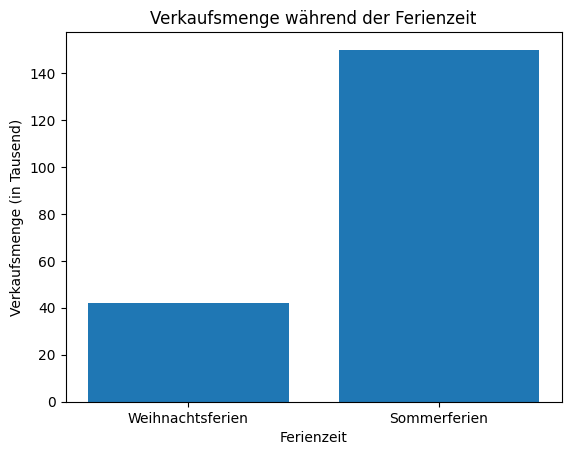

In [237]:
# Daten für Weihnachtsferien filtern und Menge summieren
weihnachtsferien = data[data['Ferienzeit TG'] == 'Weihnachtsferien']
weihnachtsferien_summe = weihnachtsferien['Menge'].sum() / 1000

# Daten für Sommerferien filtern und Menge summieren
sommerferien = data[data['Ferienzeit TG'] == 'Sommerferien']
sommerferien_summe = sommerferien['Menge'].sum() / 1000

# Balkendiagramm erstellen
ferien = ['Weihnachtsferien', 'Sommerferien']
verkaufsmenge = [weihnachtsferien_summe, sommerferien_summe]

plt.bar(ferien, verkaufsmenge)
plt.xlabel('Ferienzeit')
plt.ylabel('Verkaufsmenge (in Tausend)')
plt.title('Verkaufsmenge während der Ferienzeit')
plt.show()

Obwohl die Sommerferien nur doppelt so lange dauern wie die Winterferien, werden ca. drei Mal so viele Backwaren verkauft.

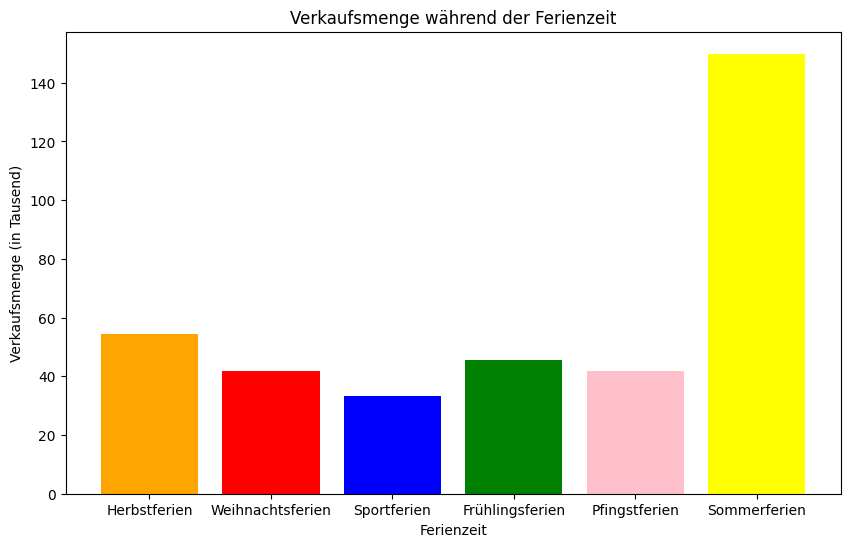

In [238]:
# Liste der Ferienzeiten
ferienzeiten = ['Herbstferien', 'Weihnachtsferien', 'Sportferien', 'Frühlingsferien', 'Pfingstferien', 'Sommerferien']

# Verkaufsmenge für jede Ferienzeit berechnen
verkaufsmenge = []
for ferienzeit in ferienzeiten:
    ferien = data[data['Ferienzeit TG'] == ferienzeit]
    ferien_summe = ferien['Menge'].sum() / 1000
    verkaufsmenge.append(ferien_summe)

# Farben definieren
farben = ['orange', 'red', 'blue', 'green', 'pink', 'yellow']

# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(ferienzeiten, verkaufsmenge, color=farben)
ax.set_xlabel('Ferienzeit')
ax.set_ylabel('Verkaufsmenge (in Tausend)')
ax.set_title('Verkaufsmenge während der Ferienzeit')
plt.show()

Es ist deutlich erkennbar, dass die Sommerferienzeit mit Abstand die profitabelste Ferienzeit für die Bäckerei ist.

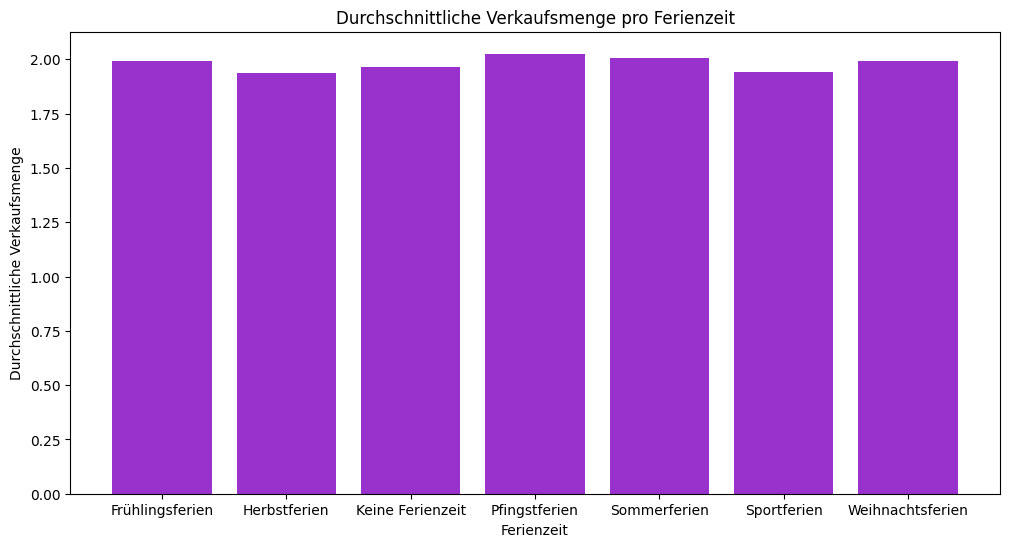

In [239]:
# Umwandeln der Ferienzeit-Spalte in eine kategorische Variable und Festlegen der Sortierung
ferienzeit_order = ["Herbstferien", "Weihnachtsferien", "Sportferien", "Frühlingsferien", "Pfingstferien", "Sommerferien"]


# Gruppieren nach Ferienzeit und Berechnen der durchschnittlichen Verkaufsmenge
grouped_data = data.groupby("Ferienzeit TG")["Menge"].mean()

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data.values, color = 'darkorchid')
plt.title("Durchschnittliche Verkaufsmenge pro Ferienzeit")
plt.xlabel("Ferienzeit")
plt.ylabel("Durchschnittliche Verkaufsmenge")
plt.show()


Während Ferienzeiten, in denen Feiertage sind, wird mehr verkauft. Dadurch bestätigt sich die Annahme, dass an Feiertagen mehr verkauft wird.

### 3.3 Ferienzeit Kanton SG

#### Im Kanton SG gibt es keine Pfingsferien, dafür aber eine Woche länger Herbstferien, als im Kanton TG. Weil sich das Einzugsgebiet der Mohn Filiale in Sulgen, auch über den benachbarten Kanton SG erstreckt, werden die Herbstferienwoche sowie die fehlende Woche Pfingstferien in einer neuen Spalte 'Ferienzeit SG' hinzugefügt. Im Kanton SG variieren die Sportferien bzw. Winterferien, je nach Gemeinde. Wir haben uns dafür entschieden, dieselbe Woche, wie für den Kanton TG dafür zu wählen.

#### a. Die Ferien aus dem Kanton werden aus folgender Quelle entnommen:
- Quelle: https://www.feiertagskalender.ch/ferien.php?geo=1827&jahr=2021

In [240]:
# Ferienlisten nach Ferienzeit erstellen
gesamtliste_herbstferien_sg = []

Schuljahr 2016/2017

In [241]:
# Herbstferien Schuljahr 2016 / 2017
ferienbeginn_sg_herbst2016_2017 = datetime.date(2016, 10, 3)
ferienende_sg_herbst2016_2017 = datetime.date(2016, 10, 23)

current_date = ferienbeginn_sg_herbst2016_2017
herbstferien_sg_sj_2016_2017 = []

while current_date <= ferienende_sg_herbst2016_2017:
    herbstferien_sg_sj_2016_2017.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2016_2017)

Schuljahr 2017/2018

In [242]:
# Herbstferien Schuljahr 2017 / 2018
ferienbeginn_sg_herbst2017_2018 = datetime.date(2017, 10, 2)
ferienende_sg_herbst2017_2018 = datetime.date(2017, 10, 22)

current_date = ferienbeginn_sg_herbst2017_2018
herbstferien_sg_sj_2017_2018 = []

while current_date <= ferienende_sg_herbst2017_2018:
    herbstferien_sg_sj_2017_2018.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2017_2018)

Schuljahr 2018/2019

In [243]:
# Herbstferien Schuljahr 2018 / 2019
ferienbeginn_sg_herbst2018_2019 = datetime.date(2018, 10, 1)
ferienende_sg_herbst2018_2019 = datetime.date(2018, 10, 21)

current_date = ferienbeginn_sg_herbst2018_2019
herbstferien_sg_sj_2018_2019 = []

while current_date <= ferienende_sg_herbst2018_2019:
    herbstferien_sg_sj_2018_2019.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2018_2019)

Schuljahr 2019/2020

In [244]:
# Herbstferien Schuljahr 2019 / 2020
ferienbeginn_sg_herbst2019_2020 = datetime.date(2019, 9, 30)
ferienende_sg_herbst2019_2020 = datetime.date(2019, 10, 20)

current_date = ferienbeginn_sg_herbst2019_2020
herbstferien_sg_sj_2019_2020 = []

while current_date <= ferienende_sg_herbst2019_2020:
    herbstferien_sg_sj_2019_2020.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2019_2020)

Schuljahr 2020/2021

In [245]:
import datetime
# Herbstferien Schuljahr 2020 / 2021
ferienbeginn_sg_herbst2020_2021 = datetime.date(2020, 9, 28)
ferienende_sg_herbst2020_2021 = datetime.date(2020, 10, 18)

current_date = ferienbeginn_sg_herbst2020_2021
herbstferien_sg_sj_2020_2021 = []

while current_date <= ferienende_sg_herbst2020_2021:
    herbstferien_sg_sj_2020_2021.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2020_2021)

Schuljahr 2021/2022

In [246]:
# Herbstferien Schuljahr 2021 / 2022
ferienbeginn_sg_herbst2021_2022 = datetime.date(2021, 10, 4)
ferienende_sg_herbst2021_2022 = datetime.date(2021, 10, 24)

current_date = ferienbeginn_sg_herbst2021_2022
herbstferien_sg_sj_2021_2022 = []

while current_date <= ferienende_sg_herbst2021_2022:
    herbstferien_sg_sj_2021_2022.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

gesamtliste_herbstferien_sg.extend(herbstferien_sg_sj_2021_2022)

#### b. Ferienzeit Kanton SG zum Datensatz hinzufügen

In [247]:
data['Datum'] = pd.to_datetime(data['Datum'])

# Neue Spalte 'Ferienzeit SG' hinzufügen und für alle Einträge 'Keine Ferienzeit' festlegen
data['Ferienzeit SG'] = 'Keine Ferienzeit'

# Abweichende Herbstferien SG zu hinzufügen
data.loc[data['Datum'].isin(gesamtliste_herbstferien_sg), 'Ferienzeit SG'] = 'Herbstferien'

# Pfingsferien werden nicht hinzugefügt

# Gleiche Ferientage TG und SG hinzufügen
data.loc[data['Datum'].isin(gesamtliste_weihnachtsferien), 'Ferienzeit SG'] = 'Weihnachtsferien'
data.loc[data['Datum'].isin(gesamtliste_sportferien), 'Ferienzeit SG'] = 'Sportferien'
data.loc[data['Datum'].isin(gesamtliste_fruehlingsferien), 'Ferienzeit SG'] = 'Frühlingsferien'
data.loc[data['Datum'].isin(gesamtliste_sommerferien), 'Ferienzeit SG'] = 'Sommerferien'

In [248]:
# Testen, ob Werte im Datensatz hinzugefügt wurden
new_data = data[['Ferienzeit TG', 'Ferienzeit SG', 'Datum']]
sorted_data_nachHerbstferienSG = new_data[new_data['Ferienzeit SG'].str.startswith('Herbstferien')].sort_values(by=['Ferienzeit SG'])
sorted_data_nachHerbstferienSG.head(89999)

,Ferienzeit TG,Ferienzeit SG,Datum
74178,Keine Ferienzeit,Herbstferien,2016-10-03
528015,Herbstferien,Herbstferien,2020-10-05
528016,Herbstferien,Herbstferien,2020-10-05
528017,Herbstferien,Herbstferien,2020-10-05
528018,Herbstferien,Herbstferien,2020-10-05
...,...,...,...
287601,Keine Ferienzeit,Herbstferien,2018-10-07
287602,Keine Ferienzeit,Herbstferien,2018-10-07
287603,Keine Ferienzeit,Herbstferien,2018-10-07
287605,Keine Ferienzeit,Herbstferien,2018-10-07


### 3.4 Geschmack

#### Wir vermuten einen Zusammenhang zwischen verkaufter Menge und ob ein Produkt süss oder herzhaft ist. Eine Hypothese ist hier beispielsweise, dass an manchen Tagen mehr süsse Produkte als herzhafte Produkte verkauft werden. So könnten Kunden vielleicht Montags eher süsses Gebäck kaufen, weil sie gestresst wegen der Arbeit sind. Genauso gut, könnte ein Peak aber auch Richtung Wochenende liegen, da viele sich dann eher etwas süsses vom Bäcker gönnen. 

#### a. Unterscheidung süss und salzige Produkte

In [249]:
# Klassifizieren der Produkte in 'süss' und 'salzig'
produkte_suess_salzig = pd.DataFrame(produkt_liste['Artikel'])
attribute = ['süss', 'salzig', 'salzig', 'salzig', 'salzig', 'salzig', 'süss', 'süss', 'süss', 'süss', 'süss', 'salzig','süss','süss']
produkte_suess_salzig['Geschmack'] = attribute
produkte_suess_salzig

# Zusammenführen der neuen Klassifizierung mit dem Datensatz
data = pd.merge(data, produkte_suess_salzig, on='Artikel')
data = data.rename(columns={'Geschmack_y': 'Geschmack'})

data.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name,offen_TG_geschlossenSG,Vortag von,Ferienzeit TG,Ferienzeit SG,Geschmack
0,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:01:46,8,2016-01-03,7,1,6.00,normaler Tag,0,normaler Tag,Weihnachtsferien,Weihnachtsferien,süss
1,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:11:19,8,2016-01-03,7,1,6.00,normaler Tag,0,normaler Tag,Weihnachtsferien,Weihnachtsferien,süss
2,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:23:41,8,2016-01-03,7,1,6.00,normaler Tag,0,normaler Tag,Weihnachtsferien,Weihnachtsferien,süss
3,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:26:53,8,2016-01-03,7,1,6.00,normaler Tag,0,normaler Tag,Weihnachtsferien,Weihnachtsferien,süss
4,Butterzopf mittel,1.0,6.0,0.0,0.0,NaN,0.0,NaN,08:39:05,8,2016-01-03,7,1,6.00,normaler Tag,0,normaler Tag,Weihnachtsferien,Weihnachtsferien,süss


#### b. Visualisierungen zu süssen und salzigen Produkten

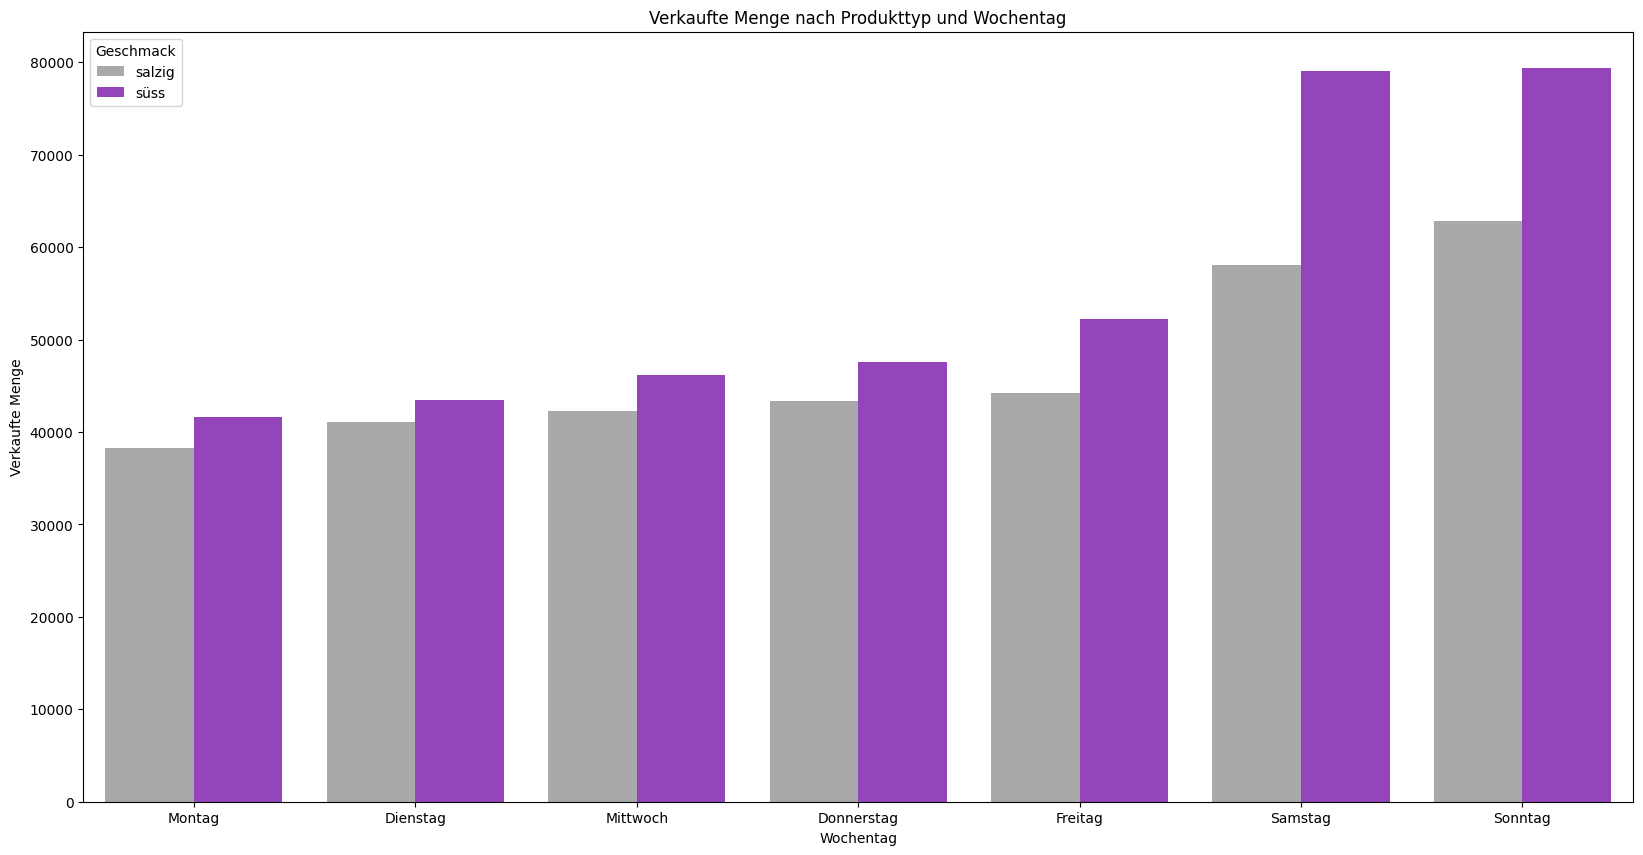

In [250]:
# Aggregieren der Daten für die Visualisierung
data_suess_salzig = data.groupby(['Wochentag', 'Geschmack']).size().reset_index(name='Verkaufte Menge')

# Visualisieren der Daten
plt.figure(figsize=(20, 10))

colors = ['darkgrey', 'darkorchid']  # Liste mit Farben für das Diagramm

sns.barplot(x='Wochentag', y='Verkaufte Menge', hue='Geschmack', data=data_suess_salzig, palette=colors)
plt.title('Verkaufte Menge nach Produkttyp und Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Verkaufte Menge')

wochentag_labels = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
plt.xticks(range(7), wochentag_labels)

# Diagramm anzeigen
plt.show()

Am Wochenende werden deutlich mehr süsse Produkte verkauft. Wichtig hierbei ist, dass das Buttergipfeli als Süssprodukt kategorisiert ist.

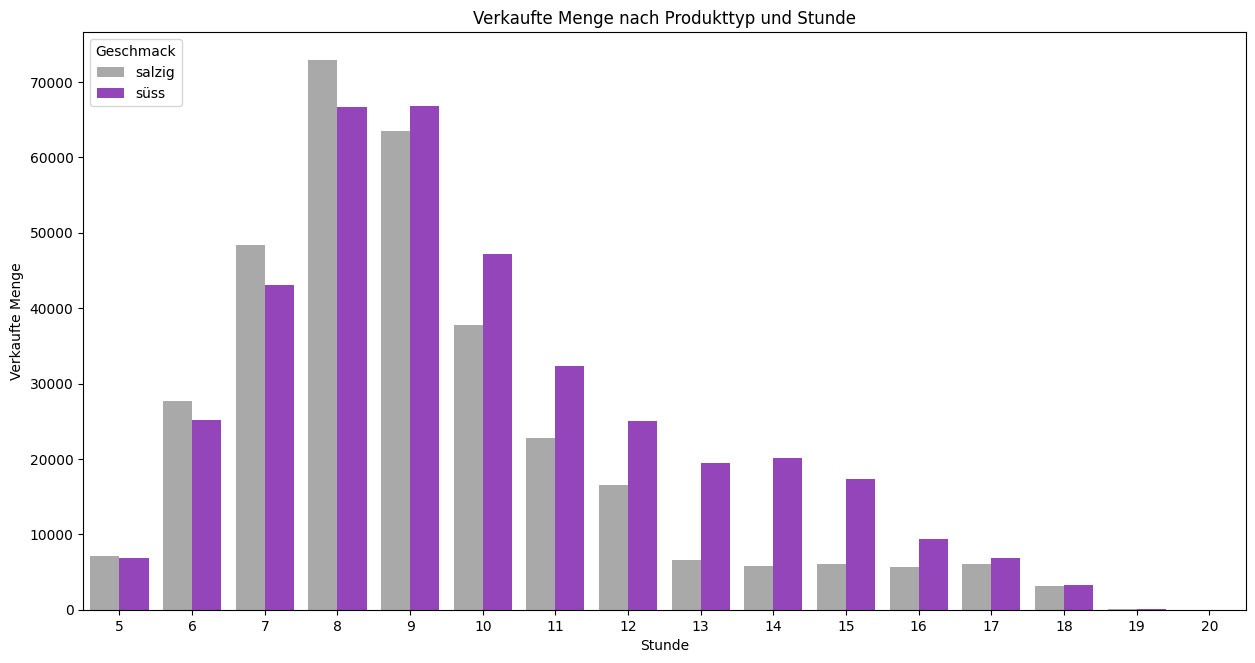

In [251]:
# Aggregieren der Daten für die Visualisierung
data_suess_salzig_proStunde = data.groupby(['Stunde', 'Geschmack']).size().reset_index(name='Verkaufte Menge')

#Visualisieren der Daten
plt.figure(figsize=(15, 7.5))

colors = ['darkgrey', 'darkorchid']  # Liste mit Farben für das Diagramm

sns.barplot(x='Stunde', y='Verkaufte Menge', hue='Geschmack', data=data_suess_salzig_proStunde, palette=colors)
plt.title('Verkaufte Menge nach Produkttyp und Stunde')
plt.xlabel('Stunde')
plt.ylabel('Verkaufte Menge')

# Diagramm anzeigen
plt.show()


Am Vormittag werden eher salzige Produkte verkauft, während der Trend am Nachmittag umschlägt und eher süsse Backwaren gekauft werden.

### 3.5 Fastenzeit

#### a. Wir fügen die christliche Fastenzeit zum Datensatz hinzu, da wir vermuten, dass einige Menschen in der Fastenzeit zumindest weniger Alkohol und Süssigkeiten konsumieren. 

- Anmerkung: Wir haben die christliche Fastenzeit nur bis Gründonnerstag beschränkt, obwohl sie streng genommen bis Ostersonntag geht. Grund dafür ist, dass viele Gebäck für die Feiertage im Voraus einkaufen

In [252]:
# Start- und Enddatum für den Datensatz bestimmen
start_datum = data["Datum"].min()
end_datum = data["Datum"].max()

# Fastenzeit Start- und Enddaten zwischen 2015 und 2022
fastenzeit = [
    (datetime.date(2015, 2, 18), datetime.date(2015, 4, 2)),
    (datetime.date(2016, 2, 10), datetime.date(2016, 3, 24)),
    (datetime.date(2017, 3, 1), datetime.date(2017, 4, 16)),
    (datetime.date(2018, 2, 14), datetime.date(2018, 3, 29)),
    (datetime.date(2019, 3, 6), datetime.date(2019, 4, 18)),
    (datetime.date(2020, 2, 26), datetime.date(2020, 4, 9)),
    (datetime.date(2021, 2, 17), datetime.date(2021, 4, 1)),
    (datetime.date(2022, 3, 2), datetime.date(2022, 4, 14)),
]
# Funktion, die prüft, ob ein Datum in der Fastenzeit liegt
def ist_in_der_fastenzeit(date):
    for start, ende in fastenzeit:
        if start <= date.date() <= ende:     
            return 1
    return 0

# Anwendung der Funktion auf die Daten und Erstellung einer neuen Spalte
data['Fastenzeit'] = data["Datum"].apply(ist_in_der_fastenzeit)


### 3.6 Ramadan

#### a. Wir fügen eine Spalte hinzu die sagt, ob ein Verkauf während des Ramadans stattgefunden hat. Wir vermuten hier einen Zusammenhang mit den Verkäufen, da sich auch eine muslimische Gemeinde in der Nähe der Filiale befindet

In [253]:
# Ramadan Start- und Enddaten zwischen 2015 und 2022
Ramadan = [
    (datetime.date(2015, 6, 17), datetime.date(2015, 7, 16)),
    (datetime.date(2016, 6, 6), datetime.date(2016, 7, 5)),
    (datetime.date(2017, 5, 26), datetime.date(2017, 6, 24)),
    (datetime.date(2018, 5, 16), datetime.date(2018, 6, 14)),
    (datetime.date(2019, 5, 5), datetime.date(2019, 6, 3)),
    (datetime.date(2020, 4, 23), datetime.date(2020, 5, 23)),
    (datetime.date(2021, 4, 12), datetime.date(2021, 5, 12)),
    (datetime.date(2022, 4, 1), datetime.date(2022, 5, 1)),
]

# Funktion, die prüft, ob ein Datum während Ramadan ist
def ist_waehrend_ramadan(date):
    for start, ende in Ramadan:
        if start <= date.date() <= ende:     
            return 1
    return 0

# Anwendung der Funktion auf die Daten und Erstellung einer neuen Spalte
data['Ramadan'] = data['Datum'].apply(ist_waehrend_ramadan)

### 3.7 Fasnacht

#### a. Es werden Listen erstellt für den Schmutzigen Donnerstag, den Faschingdienstag und den Aschermittwoch. Alle drei Feiertage sind keine gesetzlichen Feiertage im Kanton TG, werden aber auf Empfehlung von Roger Mohn hinzugefügt. 

In [254]:
# Listen mit den Fasnachts-Feiertagen und ihren Datumsangaben erstellen
schmutzigerDonnerstag = ['2016-02-04', '2017-02-23', '2018-02-08', '2019-02-28', '2020-02-20', '2021-02-11', '2022-02-24']
fasnachtsdienstag = ['2016-02-09', '2017-02-28', '2018-02-13', '2019-03-05', '2020-02-25', '2021-02-16', '2022-03-01' ]
aschermittwoch = ['2016-03-10', '2017-03-01', '2018-02-14', '2019-03-06', '2020-02-26', '2021-02-17', '2022-03-02']

# Schmutziger Donnerstag zuweisen
data.loc[data['Datum'].isin(schmutzigerDonnerstag), 'Feiertag Name'] = 'Schmutziger Donnerstag'

# Fasnachtsdienstag zuweisen
data.loc[data['Datum'].isin(fasnachtsdienstag), 'Feiertag Name'] = 'Fasnachtsdienstag'

# Aschermittwoch zuweisen
data.loc[data['Datum'].isin(aschermittwoch), 'Feiertag Name'] = 'Aschermittwoch'

In [255]:
# Testen, ob Werte für den Schmmutzigen Donnerstag zum Datensatz hinzugefügt wurden
sorted_data_nachSchmutzigerDonnerstag = data[data['Feiertag Name'].str.startswith('Schmutziger Donnerstag')].sort_values(by=['Feiertag Name'])

# Sortierten Datensatz nach Schmutzigem Donnerstag anzeigen
sorted_data_nachSchmutzigerDonnerstag.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name,offen_TG_geschlossenSG,Vortag von,Ferienzeit TG,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan
7167,Butterzopf mittel,1.0,6.2,0.0,0.0,11.383333,0.0,128.916667,14:32:05,14,2017-02-23,4,2,6.20,Schmutziger Donnerstag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0
516162,BT Nussgipfel,2.0,5.6,20.0,0.0,5.895833,0.0,106.750000,08:52:34,8,2020-02-20,4,2,2.80,Schmutziger Donnerstag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0
516161,BT Nussgipfel,2.0,5.6,20.0,0.0,5.895833,0.0,106.750000,08:19:52,8,2020-02-20,4,2,2.80,Schmutziger Donnerstag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0
516160,BT Nussgipfel,1.0,2.8,20.0,0.0,5.895833,0.0,106.750000,08:17:11,8,2020-02-20,4,2,2.80,Schmutziger Donnerstag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0
516159,BT Nussgipfel,1.0,2.8,20.0,0.0,5.895833,0.0,106.750000,07:02:50,7,2020-02-20,4,2,2.80,Schmutziger Donnerstag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0


### 3.8 Steuererklärungszeit

#### Laut Aussagen von Herrn Roger Mohn kauft die Kundschaft bewusster ein, wenn die Zeit für das Ausfüllen der Steuererklärung ansteht. Im Kanton Thurgau müssen natürliche Pesonen Ihre Einkommens- und Vermögenssteuern bis 30.04. im Folgejahr einreichen. Wenn sie das nicht machen, können sie das noch ohne spezielle Bewilligung bis zum 30.09. tun. Wenn eine Person länger braucht, muss sie / er eine Spezialbewilligung einholen und kann dann bis spätenstens 31.12 einreichen. Da die Daten zur Einreichung der Formulare variieren, nehmen wir nur die definitiven Fristen in den Datensatz mit ein. Wir verwenden dafür eine Woche zuvor als sogenannte "Steuerfrist".

#### a. Steuerklärungszeit Kanton TG hinzufügen

In [256]:
from datetime import datetime
from datetime import timedelta

# Spalten für Steuerfristen hinzufügen
data['Steuerfrist April'] = 0
data['Steuerfrist September'] = 0

# 1 Woche vor dem 30.04 des jeweiligen Jahres den Wert auf 1 setzen
for idx, row in data.iterrows():
    year = row['Datum'].year
    fristdatum = datetime(year, 4, 30) - timedelta(weeks=1)
    if row['Datum'] >= fristdatum and row['Datum'].month == 4:
        data.at[idx, 'Steuerfrist April'] = 1

# 1 Woche vor dem 30.09 des jeweiligen Jahres den Wert auf 1 setzen
for idx, row in data.iterrows():
    year = row['Datum'].year
    fristdatum = datetime(year, 9, 30) - timedelta(weeks=1)
    if row['Datum'] >= fristdatum and row['Datum'].month == 9:
        data.at[idx, 'Steuerfrist September'] = 1

In [257]:
# Testen, ob die Werte für die Steuererklärungszeit Kanton TG im Datensatz hinzugefügt wurden
sorted_data_nachSteuerfristSeptember = data.sort_values('Steuerfrist September', ascending = False)

# Sortierten Datensatz nach Steuerfrist Semptember anzeigen
sorted_data_nachSteuerfristSeptember.head()

,Artikel,Menge,Umsatz,Bestellungen,Niederschlag,Temperatur Schnitt Tag,Niederschlag Summe Tag,Globalstrahlung Schnitt Tag,Uhrzeit,Stunde,Datum,Wochentag,Monat,Stückpreis,Feiertag Name,offen_TG_geschlossenSG,Vortag von,Ferienzeit TG,Ferienzeit SG,Geschmack,Fastenzeit,Ramadan,Steuerfrist April,Steuerfrist September
541600,Hefe-Vanille-Weggli,1.0,2.4,15.0,0.0,12.375000,0.4,172.333333,14:35:06,14,2018-09-27,4,9,2.40,normaler Tag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,1
605611,Quarkzöpfli,1.0,3.9,0.0,0.0,13.333333,0.2,173.875000,12:21:43,12,2017-09-23,6,9,3.90,normaler Tag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,1
605602,Quarkzöpfli,2.0,7.8,0.0,0.0,13.333333,0.2,173.875000,10:02:54,10,2017-09-23,6,9,3.90,normaler Tag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,1
605603,Quarkzöpfli,1.0,3.9,0.0,0.0,13.333333,0.2,173.875000,10:26:42,10,2017-09-23,6,9,3.90,normaler Tag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,1
605604,Quarkzöpfli,2.0,7.8,0.0,0.0,13.333333,0.2,173.875000,10:48:56,10,2017-09-23,6,9,3.90,normaler Tag,0,normaler Tag,Keine Ferienzeit,Keine Ferienzeit,süss,0,0,0,1


### 3.9 Lohnauszahlung

#### Generell gilt in der Schweiz, dass der Lohn am letzten des Monats ausbezahlt werden muss. Obwohl viele Firmen am 25. des Monats ausbezahlen gibt es hierzu keine gesetzliche, sondern höchstens vertragliche Bindung. Aus diesem Grund bestimmen wir die Zahltagsfrist vom 25. des Monats bis zum letzten des Monats.

#### a. Zahlungsfristen für Lohnzahlungen hinzufügen

In [258]:
from pandas.tseries.offsets import MonthEnd

# Konvertieren des Datumsformat in datetime-Format
data['Datum'] = pd.to_datetime(data['Datum'])

# Bestimmen des Datums des letzten Tages des Monats
letzter_tag_des_monats = data['Datum'] + MonthEnd(1)

# Bestimmen des Datums des 25. des Monats
zwanzig_fuenfter_tag_des_monats = data['Datum'].apply(lambda x: x.replace(day=25))

# Bestimmen der Zahlungsfrist für jede Zeile
data['Zahlungsfrist'] = ((data['Datum'] >= zwanzig_fuenfter_tag_des_monats) & (data['Datum'] <= letzter_tag_des_monats)).astype(int)


In [259]:
# Testen, ob die Werte für die Zahlungsfrist der Lohnzahlungen dem Datensatz hinzugefügt wurden
data_Zahlungsfrist = data[['Zahlungsfrist', 'Datum']]
sorted_data_Zahlungsfrist = data_Zahlungsfrist.sort_values(['Zahlungsfrist'], ascending = [False])

# Sortierten Datensatz nach Zahlungsfrist anzeigen
sorted_data_Zahlungsfrist.head()

,Zahlungsfrist,Datum
719677,1,2021-05-26
311635,1,2020-07-26
311644,1,2020-07-26
311643,1,2020-07-26
311642,1,2020-07-26


In [260]:
# Test, ob der 30.05.2021 als Datum in der Zahlungsfrist erscheint
testwert_zahlungsfrist = pd.to_datetime('2021-05-30')
testwert_zahlungsfrist = data.loc[data['Datum'] == testwert_zahlungsfrist, 'Zahlungsfrist'].values[0]

# Testwert für Zahlungsfrist anzeigen
if testwert_zahlungsfrist == 1:
    print("Der 30.05.2021 gehört zur Zahlungsfrist.")
else:
    print("Der 30.05.2021 gehört nicht zur Zahlungsfrist.")

Der 30.05.2021 gehört zur Zahlungsfrist.


### 3.10 Menge vor einem Jahr

#### a. Gruppieren des Datensatzes nach Menge vor einem Jahr

In [261]:
# Hinzufügen einer Spalte für das Jahr
data['Jahr'] = data['Datum'].dt.year

# Gruppieren und Summieren der Menge nach Artikel, Jahr und Datum
data_grouped_nachVorjahr = data.groupby(['Artikel', 'Jahr', 'Datum']).agg({'Menge': 'sum'}).reset_index()

# Hinzufügen einer Spalte mit dem Datum im Vorjahr
data_grouped_nachVorjahr['Datum_Vorjahr'] = data_grouped_nachVorjahr['Datum'] - pd.DateOffset(years=1)
# Aktionstitel: Hinzufügen einer Spalte mit dem Datum im Vorjahr

# Mergen des Datensatzes mit sich selbst basierend auf Datum im Vorjahr
data_merged_nachVorjahr = pd.merge(data_grouped_nachVorjahr, data_grouped_nachVorjahr[['Artikel', 'Datum', 'Menge']],
                       left_on=['Artikel', 'Datum_Vorjahr'],
                       right_on=['Artikel', 'Datum'],
                       suffixes=('_aktuell', '_vorjahr'),
                       how='left')

# Ausgabe der letzten Zeilen des zusammengeführten DataFrames
data_merged_nachVorjahr.tail()

,Artikel,Jahr,Datum_aktuell,Menge_aktuell,Datum_Vorjahr,Datum_vorjahr,Menge_vorjahr
28234,Weggli normal,2022,2022-02-07,42.0,2021-02-07,2021-02-07,81.0
28235,Weggli normal,2022,2022-02-08,27.0,2021-02-08,2021-02-08,15.0
28236,Weggli normal,2022,2022-02-09,31.0,2021-02-09,2021-02-09,31.0
28237,Weggli normal,2022,2022-02-10,25.0,2021-02-10,2021-02-10,30.0
28238,Weggli normal,2022,2022-02-11,28.0,2021-02-11,2021-02-11,39.0


In [262]:
# Filtern des Datensatzes, um nur "Weggli Normal" am 2021-02-10 zu beinhalten, und aggregieren der Spalte "Menge"
agg_menge_weggli = data.loc[(data['Artikel'] == 'Weggli normal') & (data['Datum'] == pd.to_datetime('2021-02-10')), 'Menge'].sum()

# Aggreggierte Verkaufsmenge für Weggli am 2021-02-10 ausgeben
print(f"Aggregierte verkaufte Menge für Weggli Normal am 2021-02-10: {agg_menge_weggli}")


Aggregierte verkaufte Menge für Weggli Normal am 2021-02-10: 30.0


### 3.11 Menge vor einer Woche

#### a. Gruppieren des Datensatzes nach Menge vor einer Woche

In [263]:
# Gruppieren und Summieren der Menge nach Artikel, Jahr und Datum
data_grouped_vor7Tagen = data.groupby(['Artikel', 'Jahr', 'Datum']).agg({'Menge': 'sum'}).reset_index()

# Hinzufügen einer Spalte mit dem Datum vor 7 Tagen
data_grouped_vor7Tagen['Datum_vor7Tagen'] = data_grouped_vor7Tagen['Datum'] - pd.DateOffset(days=7)

# Mergen des Datensatzes mit sich selbst basierend auf Datum vor 7 Tagen
data_merged_vor7Tagen = pd.merge(data_grouped_vor7Tagen, data_grouped_vor7Tagen[['Artikel', 'Datum', 'Menge']],
                       left_on=['Artikel', 'Datum_vor7Tagen'],
                       right_on=['Artikel', 'Datum'],
                       suffixes=('_aktuell', '_vor7Tagen'),
                       how='left')

# Ausgabe der letzten Zeilen des zusammengeführten Datensatzes
data_merged_vor7Tagen.tail()

,Artikel,Jahr,Datum_aktuell,Menge_aktuell,Datum_vor7Tagen,Datum_vor7Tagen,Menge_vor7Tagen
28234,Weggli normal,2022,2022-02-07,42.0,2022-01-31,2022-01-31,25.0
28235,Weggli normal,2022,2022-02-08,27.0,2022-02-01,2022-02-01,32.0
28236,Weggli normal,2022,2022-02-09,31.0,2022-02-02,2022-02-02,33.0
28237,Weggli normal,2022,2022-02-10,25.0,2022-02-03,2022-02-03,51.0
28238,Weggli normal,2022,2022-02-11,28.0,2022-02-04,2022-02-04,34.0


In [264]:
# Filtern des Datensatzes, um nur "Weggli Normal" am 2022-02-03 zu beinhalten, und aggregieren der Spalte "Menge"
agg_amount = data.loc[(data['Artikel'] == 'Weggli normal') & (data['Datum'] == pd.to_datetime('2022-02-03')), 'Menge'].sum()

# Aggreggierte Verkaufsmenge für Weggli am 2022-02-03 ausgeben
print(f"Aggregierte Verkaufsmenge für Weggli normal 2022-02-03: {agg_amount}")

Aggregierte Verkaufsmenge für Weggli normal 2022-02-03: 51.0


# 4.0 Vorbereitung auf Forecasting Modelle

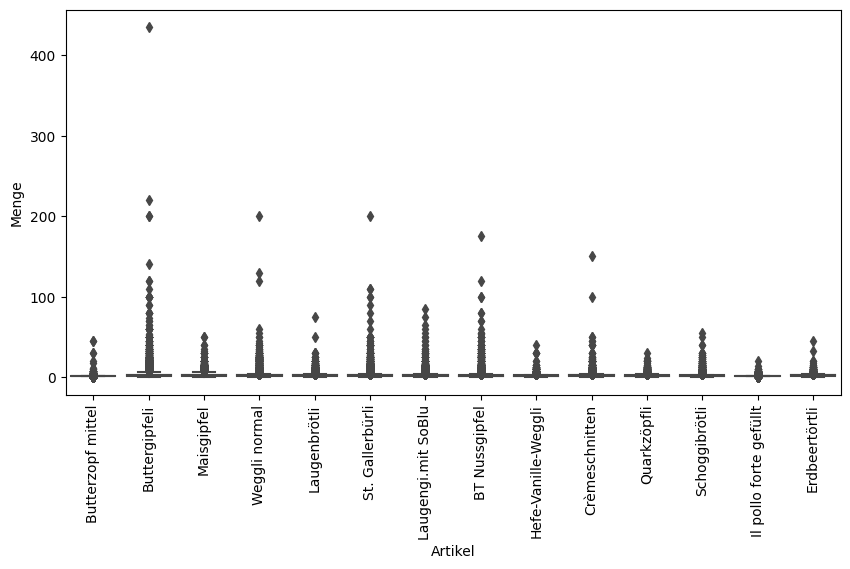

In [265]:
# Boxplot aller Artikel
plt.figure(figsize=(10, 5))
sns.boxplot(x='Artikel', y='Menge', data=data)
plt.xticks(rotation=90)
plt.show() 

Hohe Ausreisser in den Einzelbestellungen decken sich mit schlechter Performance im Modell

In [266]:
# Löschen der Artikel mit einer verkauften Menge > 20
data = data[data["Menge"] <= 20]

# Weiteres Löschen bei Artikeln mit noch kleineren Mengen

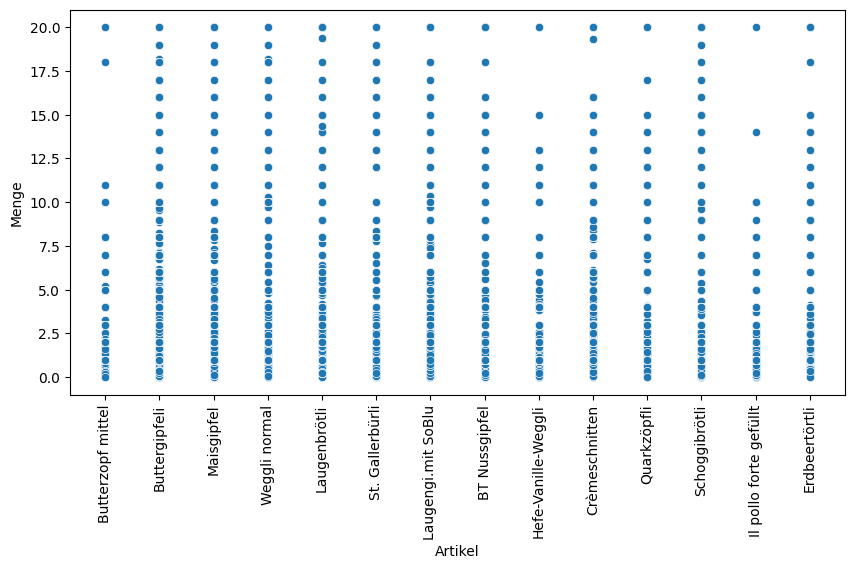

In [267]:
# Scatterplot für Bestellungen
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Artikel', y='Menge', data=data)
plt.xticks(rotation=90)
plt.show()


# 5. Forecasting Modelle

## 5.1 Vorbereitungen

Bevor die Forecasting Modelle trainiert werden können, müssen wir den Datensatz noch transformieren.

In [268]:
# Import und Einstellungen
pd.options.display.max_columns = None

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718989 entries, 0 to 719677
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Artikel                      718989 non-null  object        
 1   Menge                        718989 non-null  float64       
 2   Umsatz                       718989 non-null  float64       
 3   Bestellungen                 718989 non-null  float64       
 4   Niederschlag                 716498 non-null  float64       
 5   Temperatur Schnitt Tag       711035 non-null  float64       
 6   Niederschlag Summe Tag       718989 non-null  float64       
 7   Globalstrahlung Schnitt Tag  711035 non-null  float64       
 8   Uhrzeit                      718989 non-null  object        
 9   Stunde                       718989 non-null  int64         
 10  Datum                        718989 non-null  datetime64[ns]
 11  Wochentag                 

Aus dem Info-Befehl können wir sehen, welche Spalten vom Typ Datetime oder Object sind. Diese müssen wir droppen, oder entsprechend konvertieren, damit sie in den Forecasting Modellen berücksichtigt werden können. 

In [270]:
# Transformieren der Werte in der Spalte Ferienzeit TG in Categorical
data['Ferienzeit TG'] = data['Ferienzeit TG'].astype('category')

# Droppen von Spalten, die nicht zur Regression beitragen
data_prep = data.drop(['Umsatz', 'Feiertag Name'], axis = 1)
data_prep = pd.get_dummies(data_prep, columns = ['Ferienzeit TG', 'Geschmack', 'Vortag von', 'Ferienzeit SG', 'Wochentag', 'Monat'])

# Kontrolle des Datensatzes
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718989 entries, 0 to 719677
Data columns (total 79 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   Artikel                                          718989 non-null  object        
 1   Menge                                            718989 non-null  float64       
 2   Bestellungen                                     718989 non-null  float64       
 3   Niederschlag                                     716498 non-null  float64       
 4   Temperatur Schnitt Tag                           711035 non-null  float64       
 5   Niederschlag Summe Tag                           718989 non-null  float64       
 6   Globalstrahlung Schnitt Tag                      711035 non-null  float64       
 7   Uhrzeit                                          718989 non-null  object        
 8   Stunde                  

Im nächsten Schritt müssen wir entscheiden, wie wir mit NA-Werten umgehen. Glücklicherweise hat unser Datensatz davon ziemlich wenige, außer in der Spalte "Menge_vorjahr", was dadurch erklärbar ist, da für das erste Jahr im Datensatzen natürlich keine Vorjahres-Menge vorliegt. 

Da wir wissen, dass die Vorjahresmenge ein wichtiges Feature in den Modellen ist, haben wir uns gegen ein Imputieren entschieden und die alle Spalten mit NAs gelöscht, bzw. nicht in den Modellen berücksichtigt.

In [271]:
# Entfernen von Missing Values ausser in Dummies
data_prep = data_prep.dropna()
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708544 entries, 520 to 719677
Data columns (total 79 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   Artikel                                          708544 non-null  object        
 1   Menge                                            708544 non-null  float64       
 2   Bestellungen                                     708544 non-null  float64       
 3   Niederschlag                                     708544 non-null  float64       
 4   Temperatur Schnitt Tag                           708544 non-null  float64       
 5   Niederschlag Summe Tag                           708544 non-null  float64       
 6   Globalstrahlung Schnitt Tag                      708544 non-null  float64       
 7   Uhrzeit                                          708544 non-null  object        
 8   Stunde                

Nach dem Data-Cleaning resetten wir sicherheitshalber die Indizes des Datensatzes.

In [272]:
data_prep.reset_index(drop=True, inplace=True)
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708544 entries, 0 to 708543
Data columns (total 79 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   Artikel                                          708544 non-null  object        
 1   Menge                                            708544 non-null  float64       
 2   Bestellungen                                     708544 non-null  float64       
 3   Niederschlag                                     708544 non-null  float64       
 4   Temperatur Schnitt Tag                           708544 non-null  float64       
 5   Niederschlag Summe Tag                           708544 non-null  float64       
 6   Globalstrahlung Schnitt Tag                      708544 non-null  float64       
 7   Uhrzeit                                          708544 non-null  object        
 8   Stunde                  

Nachdem wir unseren Datensatz auf seine Richtigkeit überprüft haben, löschen wir die Spalten Datum und Bestellungen, da sie nicht zum Forecasting beitragen. 

Gründe: 
* Bestellungen, weil wir nicht herausfinden konnten was die Bedeutung der Variablen ist. 
* Datum, weil es als Object Type nicht sinnvoll zu unserem Forecasting beitragen kann

In [273]:
# Löschen von Datum und Bestellungen
data_prep = data_prep.drop(['Datum', 'Bestellungen'], axis = 1)

# Erstellen einer Kopie, des fertigen Datensatzes, auf die wir später wieder zurückgreifen könenn
pre_optimized = data_prep.copy()
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708544 entries, 0 to 708543
Data columns (total 77 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Artikel                                          708544 non-null  object 
 1   Menge                                            708544 non-null  float64
 2   Niederschlag                                     708544 non-null  float64
 3   Temperatur Schnitt Tag                           708544 non-null  float64
 4   Niederschlag Summe Tag                           708544 non-null  float64
 5   Globalstrahlung Schnitt Tag                      708544 non-null  float64
 6   Uhrzeit                                          708544 non-null  object 
 7   Stunde                                           708544 non-null  int64  
 8   Stückpreis                                       708544 non-null  object 
 9   offen_TG_geschl

## 6.2 Erstellen der Modelle

Alle Modelle wurden nach dem gleichen Schema als Funktion erstellt. So konnten wir schnell die verschiedenden Modelle auf alle Artikel anwenden, und effizient Parameter anpassen.

### 6.2.1 Lineare Regression

In [274]:
# Importieren wichtiger Packages für die Lineare Regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [275]:
# Kopie des Datensatzes erstellen
data = data_prep.copy()

Als erstes definieren wir eine Funktion mit der ein lineares Regressionsmodell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [276]:
def LinReg_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]
    
    # Splitting des Datensatzes in Features (X) und Target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definition des Linear Regression Models
    model = LinearRegression()
    
    # Training des Models
    model.fit(X_train, y_train)
    
    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test)
    
    # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [277]:
linReg_Artikel = []   
metric_names = ['MAPE', 'R2', 'RMSE']

for product in data['Artikel'].unique():
    model_metrics = LinReg_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'LinReg', 'product': product, **dict(zip(metric_names, model_metrics))}
    linReg_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
linReg_Artikel = pd.DataFrame(linReg_Artikel)
linReg_Artikel

TypeError: float() argument must be a string or a real number, not 'datetime.time'

Damit wir später die Modelle basierend auf dem MAPE vergleichen können, extrahieren wir die Spalte aus dem Datensatz und speichern sie separat ab.

In [278]:
# Extrahieren des MAPE aus dem Dataframe
LinReg_Artikel_MAPE = linReg_Artikel[['product', 'MAPE']]
LinReg_Artikel_MAPE

TypeError: list indices must be integers or slices, not list

 <b> <span style="color: red;">VISUALISIERUNGEN GGF ERGÄNZEN </span> </b>

### 6.2.2 XGBoost Regressor

In [279]:
# Modul für Gradient Boosting importieren
import xgboost as xgb

Als erstes definieren wir eine Funktion mit der ein XGBoost Modell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [280]:
def XGB_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]
    
    # Splitting des Datensatzes in Features (X) und Target (y
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definition des XGBoost Models
    model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)
    
    # Training des Modells
    model.fit(X_train, y_train)
    
    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test)
    
    # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [281]:
xgb_Artikel = [] 
metric_names = ['MAPE', 'R2', 'RMSE']

for product in data['Artikel'].unique():
    model_metrics = XGB_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'XGBoost', 'product': product, **dict(zip(metric_names, model_metrics))}
    xgb_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
xgb_Artikel = pd.DataFrame(xgb_Artikel)
xgb_Artikel

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Uhrzeit: object, Stückpreis: object

Damit wir später die Modelle basierend auf dem MAPE vergleichen können, extrahieren wir die Spalte aus dem Datensatz und speichern sie separat ab.

In [ ]:
# Extrahieren des MAPE aus dem Dataframe
xgb_Artikel_MAPE = xgb_Artikel[['product', 'MAPE']]
xgb_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.328407
1,Buttergipfeli,0.198079
2,Butterzopf_mittel,0.582720
3,Crèmeschnitten,0.309175
4,Hefe-Vanille-Weggli,0.339597
5,Laugenbrötli,0.244169
6,Laugengi.mit_SoBlu,0.155910
7,Maisgipfel,0.158413
8,St._Gallerbürli,0.236641
9,Weggli_normal,0.273704


 <b> <span style="color: red;">VISUALISIERUNGEN GGF ERGÄNZEN </span> </b>

### 6.2.3 Random Forest

In [285]:
# Klasse RandomForestRegressor importieren
from sklearn.ensemble import RandomForestRegressor

Als erstes definieren wir eine Funktion mit der ein Random Forest Modell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [283]:
def RF_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]
    
    # Splitting des Datensatzes in Features (X) und Target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definition des Random Forest Models
    model = RandomForestRegressor(n_jobs=-1)
    
    # Training des Models
    model.fit(X_train, y_train)
    
    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test)
    
     # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [286]:
RF_Artikel = []  
metric_names = ['MAPE', 'R2', 'RMSE'] 

for product in data['Artikel'].unique():
    model_metrics = RF_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'Random Forest', 'product': product, **dict(zip(metric_names, model_metrics))}
    RF_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
RF_Artikel = pd.DataFrame(RF_Artikel)
RF_Artikel

TypeError: float() argument must be a string or a real number, not 'datetime.time'

Damit wir später die Modelle basierend auf dem MAPE vergleichen können, extrahieren wir die Spalte aus dem Datensatz und speichern sie separat ab.

In [ ]:
# Extrahieren des MAPE aus dem Dataframe
RF_Artikel_MAPE = RF_Artikel[['product', 'MAPE']]
RF_Artikel_MAPE

,product,MAPE
0,BT_Nussgipfel,0.316523
1,Buttergipfeli,0.197160
2,Butterzopf_mittel,0.475940
3,Crèmeschnitten,0.266063
4,Hefe-Vanille-Weggli,0.327503
5,Laugenbrötli,0.222071
6,Laugengi.mit_SoBlu,0.149872
7,Maisgipfel,0.148332
8,St._Gallerbürli,0.215852
9,Weggli_normal,0.264313


 <b> <span style="color: red;">VISUALISIERUNGEN GGF ERGÄNZEN </span> </b>

### 6.2.4 LASSO Regression

In [287]:
# Lasso Regression importieren
from sklearn.linear_model import Lasso

Als erstes definieren wir eine Funktion mit der ein LASSO Regressions-Modell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [288]:
def LASSO_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]
    
    # Splitting des Datensatzes in Features (X) und Target (y)
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']
    
    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Definition des Lasso Models
    model = Lasso()
    
    # Training des Models
    model.fit(X_train, y_train)
    
    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test)
    
     # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = model.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [289]:
LASSO_Artikel = [] 
metric_names = ['MAPE', 'R2', 'RMSE'] 

for product in data['Artikel'].unique():
    model_metrics = LASSO_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'LASSO', 'product': product, **dict(zip(metric_names, model_metrics))}
    LASSO_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
LASSO_Artikel = pd.DataFrame(LASSO_Artikel)
LASSO_Artikel

TypeError: float() argument must be a string or a real number, not 'datetime.time'

Damit wir später die Modelle basierend auf dem MAPE vergleichen können, extrahieren wir die Spalte aus dem Datensatz und speichern sie separat ab.

In [290]:
# Extrahieren des MAPE aus dem Dataframe
LASSO_Artikel_MAPE = LASSO_Artikel[['product', 'MAPE']]
LASSO_Artikel_MAPE

TypeError: list indices must be integers or slices, not list

 <b> <span style="color: red;">VISUALISIERUNGEN GGF ERGÄNZEN </span> </b>

### 6.2.5 Neural Net

In [ ]:
#import tensorflow as tf
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam
#from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


Als erstes definieren wir eine Funktion mit der ein LASSO Regressions-Modell erstellt und trainiert wird. Basierend auf diesem werden dann Vorhersagen mit dem Test-Datensatz gemacht und die KPI zur evaulierung berechnet, bzw. gespeichert. 

In [ ]:
def neural_net_train_and_evaluate_product_model(data, product_id):
    # Filtern des Datensatzes für den jeweilige Artikel
    product_data = data[data['Artikel'] == product_id]

    # Splitting des Datensatzes in Features (X) und Target (y
    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']

    # Splitting des Datensatzes in Trainings- und Testdaten
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale your input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Erstellen des Neuronalen Netzes
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    optimizer = Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Training des Models
    model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=0)

    # Erstellen von Vorhersagen basierend auf den Testdaten
    y_pred = model.predict(X_test_scaled)

    # Berechnen der KPI (MAPE, R2, RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    return MAPE, R2, RMSE

Nachdem wir die Funktion definiert haben, wenden wir sie auf alle Artikel unseres Datensatzes an. Die KPI für jeden Artikel werden dann in einer Tabelle gespeichert. So können die Artikel optimal untereinander verglichen werden. 

In [ ]:
NeuralNet_Artikel = []
metric_names = ['MAPE', 'R2', 'RMSE']

for product in data['Artikel'].unique():
    model_metrics = neural_net_train_and_evaluate_product_model(data, product)
    model_metrics_dict = {'Type': 'Neural Net', 'product': product, **dict(zip(metric_names, model_metrics))}
    NeuralNet_Artikel.append(model_metrics_dict)

# Visualisierung der KPI pro Artikel
NeuralNet_Artikel = pd.DataFrame(NeuralNet_Artikel)
NeuralNet_Artikel


NameError: name 'Sequential' is not defined

## 6.3 Vergleich der Modelle

Als erstes Verbinden wir die vorher extrahierten MAPEs der einzelnen Modelle zu einer großen Performance-Vergleichstabelle.

In [ ]:
# Verbinden der beiden Dataframes
Artikel_MAPE_temp1 = pd.merge(LinReg_Artikel_MAPE, xgb_Artikel_MAPE, on='product')
Artikel_MAPE_temp2 = pd.merge(Artikel_MAPE_temp1, RF_Artikel_MAPE, on='product')
#Artikel_MAPE_temp3 = pd.merge(Artikel_MAPE_temp2, NeuralNet_Artikel_MAPE, on='product')
Artikel_MAPE = pd.merge(Artikel_MAPE_temp2, LASSO_Artikel_MAPE, on='product')                       # To fix
 
# Umbenennen der Spalten für bessere Lesbarkeit
Artikel_MAPE.columns = ['Artikel', 'Lineare Regression', 'XGB', 'Random Forest', 'Lasso']

/var/folders/xt/0h_f_zjs1hvcdg6rdl1hs5_c0000gn/T/ipykernel_85146/2472384335.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MAPE_x'} in the result is deprecated and will raise a MergeError in a future version.
  Artikel_MAPE = pd.merge(Artikel_MAPE_temp2, LASSO_Artikel_MAPE, on='product')


Im nächsten Schritt ergänzen wir eine Spalte, die das Modell mit dem geringsten MAPE bestimmt und einer weiteren Spalte hinzufügt. So wissen wir später welches Modell sich am meisten zu optimieren lohnt. 

In [ ]:
# Hinzufügen einer Spalte, die Spalte mit dem kleinsten MAPE-Wert enthält
Artikel_MAPE['Bestes Modell'] = Artikel_MAPE[['Lineare Regression', 'XGB', 'Random Forest', 'Lasso']].idxmin(axis=1)

# Iteration: 
# Wir vermuten, dass manche Modelle die zwar unoptimiert nicht das Beste sind, optimiert bessere Ergebnisse erzielen können.
# Deshalb wird bei manchen Spalten das Modell mit einem scheinbar "schlechteren" ersetzt.
Artikel_MAPE.loc[7, 'Bestes Modell'] = 'Lasso'

Artikel_MAPE

,Artikel,Lineare Regression,XGB,Random Forest,Lasso,Bestes Modell
0,BT_Nussgipfel,0.307635,0.328407,0.316488,0.318069,Lineare Regression
1,Buttergipfeli,0.200274,0.198079,0.196613,0.202644,Random Forest
2,Butterzopf_mittel,0.397197,0.582720,0.466152,0.519261,Lineare Regression
3,Crèmeschnitten,0.284610,0.309175,0.266507,0.316810,Random Forest
4,Hefe-Vanille-Weggli,0.337346,0.339597,0.328591,0.339780,Random Forest
5,Laugenbrötli,0.221177,0.244169,0.223848,0.233722,Lineare Regression
6,Laugengi.mit_SoBlu,0.147328,0.155910,0.150102,0.172769,Lineare Regression
7,Maisgipfel,0.158195,0.158413,0.149524,0.163760,Lasso
8,St._Gallerbürli,0.216114,0.236641,0.216282,0.261732,Lineare Regression
9,Weggli_normal,0.268738,0.273704,0.262209,0.295284,Random Forest


## 6.4 Optimierung des Datensatzes

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer

Da wir unsere Modelle über den MAPE evaluieren, müssen wir als erstes eine Funktion definieren, damit wir den MAPE als Kriterium in der Optimierung nutzen können. Danach definieren wir eine Funktion, für einen Gridsearch mit Cross Validation, mit der wir dann alle Modelle flexibel optimieren können.

In [ ]:
# Custom Funktion, mit der der MAPE in GridSearchCV verwendet werden kann
def mape_scorer(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Funktion, um eine GridSearchCV mit Cross-Validation durchzuführen
def grid_search_cv(model, params, X_train, y_train, cv=5):
    grid = GridSearchCV(model, param_grid=params, scoring=make_scorer(mape_scorer, greater_is_better=False), cv=cv)
    grid.fit(X_train, y_train)
    return grid.best_params_, -grid.best_score_

Im nächsten Schritt erstellen wir ein Dictionary, aus dem die Grid-Search Funktion für jedes Modell die zu testenden Parameter beziehen kann und ein Dictionary, dass das die korrekte Modell Funktion übergibt. 

In [ ]:
# Festlegen der zu optimierenden Modelle und deren Hyperparameter
model_hyperparameters = {
    'Lineare Regression': {},
    'XGB': {'learning_rate': [0.1, 0.2],
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'subsample': [0.5, 1],
        'colsample_bytree': [0.5, 1],
        'gamma': [0, 1],},
    'Random Forest': {'n_estimators': [20, 50, 100],
        'max_depth': [None,3, 5,10],
        'min_samples_split': [2,5, 15],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 5, 10]},
    'Lasso': {
        'alpha': [0.01, 1],
        'fit_intercept': [True, False],
        'max_iter': [1000, 1500],
        'tol': [1e-4],},
}

In [ ]:
# Dictionary mit Model Name und Model Funktion
models = {
    'Lineare Regression': LinearRegression(),
    'XGB': XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Lasso': Lasso(),}

In [ ]:
# Festlegen der Ziel-Variable
target = data['Menge']

In diesem Schritt wird eine For-Schleife definiert, die für jeden Artikel das unoptimiert beste Modell nimmt und via Gridsearch optimiert. Danach speichert sie die besten Parameter ab. 

In [ ]:
for index, row in Artikel_MAPE.iterrows():
    product = row['Artikel']
    best_model_name = row['Bestes Modell']
    best_model = models[best_model_name]

    # Filtern der Daten für den spezifischen Artikel
    product_data = data[data['Artikel'] == product]

    X = product_data.drop(['Menge', 'Artikel'], axis=1)
    y = product_data['Menge']

    # Splitting der Daten in Trainings- und Testdatensatz
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Durchführen der GridSearchCV
    params = model_hyperparameters[best_model_name]
    best_params, best_score = grid_search_cv(best_model, params, X_train, y_train)

    # Ausgabe der besten Hyperparameter und des besten MAPE Scores
    Artikel_MAPE.loc[index, 'Best Hyperparameters'] = str(best_params)
    Artikel_MAPE.loc[index, 'Best MAPE'] = best_score

    # Retraining des besten modells mit den besten Hyperparametern
    best_model.set_params(**best_params)
    best_model.fit(X, y)
    print(f"Best model for {product} retrained with best hyperparameters and MAPE score on the entire dataset.")
    
Artikel_MAPE

Best model for BT_Nussgipfel retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Buttergipfeli retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Butterzopf_mittel retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Crèmeschnitten retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Hefe-Vanille-Weggli retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Laugenbrötli retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Laugengi.mit_SoBlu retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+05, tolerance: 9.394e+02
  model = cd_fast.enet_coordinate_descent(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.326e+05, tolerance: 9.563e+02
  model = cd_fast.enet_coordinate_descent(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

Best model for Maisgipfel retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for St._Gallerbürli retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Weggli_normal retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Il_pollo_forte_gefüllt retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Quarkzöpfli retrained with best hyperparameters and MAPE score on the entire dataset.


/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/moritzwissel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this pa

Best model for Schoggibrötli retrained with best hyperparameters and MAPE score on the entire dataset.
Best model for Erdbeertörtli retrained with best hyperparameters and MAPE score on the entire dataset.


,Artikel,Lineare Regression,XGB,Random Forest,Lasso,Bestes Modell,Best Hyperparameters,Best MAPE
0,BT_Nussgipfel,0.307635,0.328407,0.316488,0.318069,Lineare Regression,{},0.326298
1,Buttergipfeli,0.200274,0.198079,0.196613,0.202644,Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 50}",0.191940
2,Butterzopf_mittel,0.397197,0.582720,0.466152,0.519261,Lineare Regression,{},0.376400
3,Crèmeschnitten,0.284610,0.309175,0.266507,0.316810,Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 20}",0.306108
4,Hefe-Vanille-Weggli,0.337346,0.339597,0.328591,0.339780,Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}",0.264550
5,Laugenbrötli,0.221177,0.244169,0.223848,0.233722,Lineare Regression,{},0.222533
6,Laugengi.mit_SoBlu,0.147328,0.155910,0.150102,0.172769,Lineare Regression,{},0.151182
7,Maisgipfel,0.158195,0.158413,0.149524,0.163760,Lasso,"{'alpha': 0.01, 'fit_intercept': False, 'max_iter': 1500, 'tol': 0.0001}",0.183374
8,St._Gallerbürli,0.216114,0.236641,0.216282,0.261732,Lineare Regression,{},0.227391
9,Weggli_normal,0.268738,0.273704,0.262209,0.295284,Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}",0.225928


Anschließend geben wir die besten Hyperparameter-Kombinationen für jeden Artikel aus. So konnten wir iterativ die Hyper-Parameter-Dictionaries fine-tunen. 

In [ ]:
# Ausgabe der besten Hyperparameter pro Artikel, um Dictionaries zu fine-tunen
pd.set_option('display.max_colwidth', -1)
Artikel_MAPE['Best Hyperparameters']

/var/folders/xt/0h_f_zjs1hvcdg6rdl1hs5_c0000gn/T/ipykernel_9669/1516340485.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


NameError: name 'Artikel_MAPE' is not defined

Im letzten Schritt erstellen wir eine Übersicht mit dem besten Modell und dessen MAPE pro Artikel.

In [ ]:
# Identifikation der besten 
Artikel_MAPE['Total Best'] =  Artikel_MAPE[['Lineare Regression', 'XGB', 'Random Forest', 'Lasso', 'Best MAPE']].idxmin(axis=1)
Artikel_MAPE['MAPE'] = Artikel_MAPE[['Lineare Regression', 'XGB', 'Random Forest', 'Lasso', 'Best MAPE']].min(axis=1)
best_Models = Artikel_MAPE[['Artikel', 'Total Best', 'MAPE']]
best_Models

,Artikel,Total Best,MAPE
0,BT_Nussgipfel,Lineare Regression,0.307635
1,Buttergipfeli,Best MAPE,0.191940
2,Butterzopf_mittel,Best MAPE,0.376400
3,Crèmeschnitten,Random Forest,0.266507
4,Hefe-Vanille-Weggli,Best MAPE,0.264550
5,Laugenbrötli,Lineare Regression,0.221177
6,Laugengi.mit_SoBlu,Lineare Regression,0.147328
7,Maisgipfel,Random Forest,0.149524
8,St._Gallerbürli,Lineare Regression,0.216114
9,Weggli_normal,Best MAPE,0.225928


 <b> <span style="color: red;"> FOLGENDEN BLOCK NACH NEURAL NET INTEGRATION ANPASSEN </span> </b>

In [ ]:
# Händisches Überschreiben mancher Zellen um Neural Nets einzubinden
best_Models.loc[best_Models['Artikel'] == 'Crèmeschnitten', 'Total Best'] = 'Neural Net'
best_Models.loc[best_Models['Artikel'] == 'Crèmeschnitten', 'MAPE'] = '0.264753'

best_Models.loc[best_Models['Artikel'] == 'St._Gallerbürli', 'Total Best'] = 'Neural Net'
best_Models.loc[best_Models['Artikel'] == 'St._Gallerbürli', 'MAPE'] = '0.215893'

best_human_df

/var/folders/xt/0h_f_zjs1hvcdg6rdl1hs5_c0000gn/T/ipykernel_85146/794694924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_human_df.loc[best_human_df['Artikel'] == 'Crèmeschnitten', 'MAPE'] = '0.264753'


,Artikel,Total Best,MAPE
0,BT_Nussgipfel,Lineare Regression,0.307635
1,Buttergipfeli,Best MAPE,0.19194
2,Butterzopf_mittel,Best MAPE,0.3764
3,Crèmeschnitten,Neural Net,0.264753
4,Hefe-Vanille-Weggli,Best MAPE,0.26455
5,Laugenbrötli,Lineare Regression,0.221177
6,Laugengi.mit_SoBlu,Lineare Regression,0.147328
7,Maisgipfel,Random Forest,0.149524
8,St._Gallerbürli,Neural Net,0.215893
9,Weggli_normal,Best MAPE,0.225928


## 7 Graphische Aufbereitung der Ergebnisse

Um die Performance in der Präsentation grafisch darzustellen, erstellen wir eine Funktion, für jeden Artikel den MAPE mit einem Balken ausgibt. 

BT_Nussgipfel	Lineare Regression


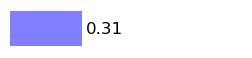

Buttergipfeli	Random Forest


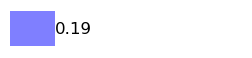

Butterzopf_mittel	Lineare Regression


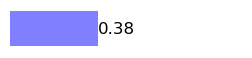

Crèmeschnitten	Random Forest


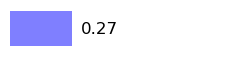

Hefe-Vanille-Weggli	Random Forest


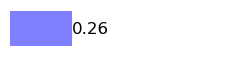

Laugenbrötli	Lineare Regression


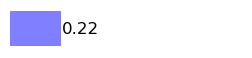

Laugengi.mit_SoBlu	Lineare Regression


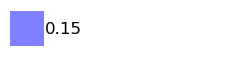

Maisgipfel	Lasso


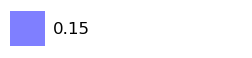

St._Gallerbürli	Lineare Regression


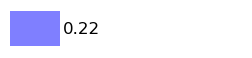

Weggli_normal	Random Forest


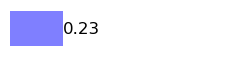

Il_pollo_forte_gefüllt	Random Forest


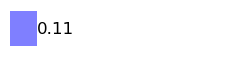

Quarkzöpfli	Lasso


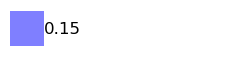

Schoggibrötli	Random Forest


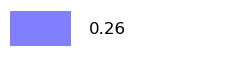

Erdbeertörtli	Lineare Regression


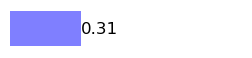

In [ ]:
def plot_bar(row):
    fig, ax = plt.subplots(figsize=(3, 0.5))
    ax.barh(row['Artikel'], row['MAPE'], color='b', alpha=0.5, height=0.001)
    ax.set_xlim(0, 1)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.text(row['Best MAPE'], 0, f'{row["MAPE"]:.2f}', va='center', ha='left', fontsize=12)
    plt.box(False)
    plt.savefig(f"Plots/{row['Artikel']}_MAPE.png", dpi=300, bbox_inches='tight')
    plt.show()

# Display the table and the corresponding bar plots
for index, row in Artikel_MAPE.iterrows():
    print(f"{row['Artikel']}\t{row['Bestes Modell']}")
    plot_bar(row)


# Anhang

## Test-Optimierung des XGBoost Modells mit Cross Validation und Grid Search für Buttergipfeli

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Initialisieren des Modells
xgb = xgb.XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
}

# Erschaffen einer GridSearchCV object
xgb_CV_Buttergipfel = GridSearchCV(xgb, param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=1)
xgb_CV_Buttergipfel.fit(X_buttergipfel_train, y_buttergipfel_train)

# Bestes Modell speichern
best_xgb = xgb_CV_Buttergipfel.best_estimator_

# KPIs berechnen
best_model_R2 = best_xgb.score(X_buttergipfel_train, y_buttergipfel_train)
y_pred_xgb = best_xgb.predict(X_buttergipfel_test)
best_model_RMSE = mean_squared_error(y_buttergipfel_test, y_pred_xgb, squared=False)
best_model_MAPE = mean_absolute_percentage_error(y_buttergipfel_test, y_pred_xgb)

print("Best Model R2:", best_model_R2)
print("Best Model RMSE:", best_model_RMSE)
print("Best Model MAPE:", best_model_MAPE)

# print best parameter after tuning
print(xgb_CV_Buttergipfel.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Model R2: 0.7600103017954999
Best Model RMSE: 40.40527586277704
Best Model MAPE: 0.18931041347763644
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


## Test zum Anpassen von Extremwerten in der Menge

Vor allem der 'Butterzopf_mittel' sticht in der Analyse heraus. Er hat einen unglaublich hohen MAPE mit 62% Abweichung aber auch ein hohes R2 (0.84). Deshalb nehmen wir diesen Artikel als Startpunkt auf der Suche nach besserem Verständnis unseres Modells und den Eigenheiten des Datensatzes

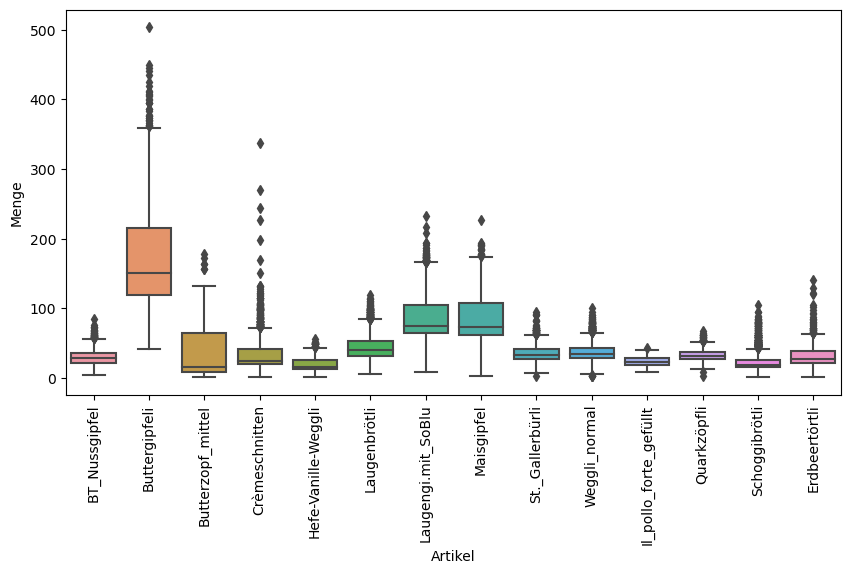

In [ ]:
# Boxplot aller Artikel
plt.figure(figsize=(10, 5))
sns.boxplot(x='Artikel', y='Menge', data=data_prep)
plt.xticks(rotation=90)
plt.show() 

In [ ]:
# Für Butterzopf_mittel: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
butterzopf_mittel = pre_optimized[data_prep['Artikel'] == 'Butterzopf_mittel']
print(butterzopf_mittel['Menge'].describe())
print('Summe: ', butterzopf_mittel['Menge'].sum())
print('Median: ', butterzopf_mittel['Menge'].median())


count    1556.000000
mean     33.820821  
std      33.645808  
min      1.000000   
25%      8.000000   
50%      15.000000  
75%      64.000000  
max      178.000000 
Name: Menge, dtype: float64
Summe:  52625.197132616486
Median:  15.0


Beim Butterzopf ist auffällig, dass bei einer relativ geringen Menge (16% von Verkaufsmenge Buttergipfel) eine hohe Variation in den gekauften Mengen besteht. Das erkennt man besonders daran, dass der Durchschnitt bei 31.6 liegt, während der Median nur bei 15 liegt.

Um dem entgegenzuwirken entfernen wir Werte größer 20, da wir davon ausgehen, dass solch große Mengen nicht ohne Voranküdigung gekauft werden. Und wenn der Kauf vorbestellt ist, dann ist er auch nicht mehr für unsere Prediciton relevant.

In [ ]:

butterzopf_mittel = butterzopf_mittel[butterzopf_mittel['Menge'] < 20]
butterzopf_test = XGB_train_and_evaluate_product_model(butterzopf_mittel, 'Butterzopf_mittel')
print(butterzopf_test)


AttributeError: 'XGBRegressor' object has no attribute 'XGBRegressor'

Mit sinkendem Maximalen Wert, ist die der MAPE ebenfalls. Deshalb wenden wir diese Cleaning Maßnahme nun auch im richtigen Modell an

In [ ]:
# Für Schoggibrötli: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
Schoggibrötli = data_prep[data_prep['Artikel'] == 'Schoggibrötli']
print(Schoggibrötli['Menge'].describe())
print('Summe: ', Schoggibrötli['Menge'].sum())
print('Median: ', Schoggibrötli['Menge'].median())

NameError: name 'data_prep' is not defined

In [ ]:
# Für Butterzopf_mittel: Berechnung der minimalen und maximalen Menge, sowie der Gesamtsumme der Menge
buttergipfeli = data_prep[data_prep['Artikel'] == 'Buttergipfeli']
print(buttergipfeli['Menge'].describe())
print('Summe: ', buttergipfeli['Menge'].sum())
print('Median: ', buttergipfeli['Menge'].median())

Im Vergleich mit dem Buttergipfel zeigt sich, dass 

# Ablage

In [ ]:
# One-Hot-Encoding für die Spalte "Artikel"
#data_prep = pd. get_dummies (data_prep, columns = [ 'Artikel' ])

# Gruppieren der Daten nach Datum und berechnen der Summe der Menge pro Artikel
#sum_cols = ['Menge', 'Bestellungen']

mean_cols = ['Temperatur Schnitt Tag','Niederschlag Summe Tag', 
             'Globalstrahlung Schnitt Tag', 'Fastenzeit','Ramadan']

for col in data_prep.columns:
    if col.startswith(('Ferienzeit', 'Geschmack', 'Feiertag', 'Vortag von', 'Ferienzeit SG')):
        mean_cols.append(col)

agg_dict = {col: 'sum' for col in sum_cols}
agg_dict.update({col: 'mean' for col in mean_cols})

data_prep = data_prep.groupby(['Datum', 'Artikel']).agg(agg_dict).reset_index()

# Ersetzen der Leerzeichen in Artikel mit Unterstrich
data_prep['Artikel'] = data_prep['Artikel'].str.replace(' ', '_')
data_prep = data_prep.drop('Datum', axis = 1)
data_prep.head()

In [ ]:
buttergipfel = data[data['Artikel'] == 'Buttergipfeli']
buttergipfel.head()

# Splitten des Datensets in Trainings- und Testdaten
X = buttergipfel.drop(['Menge', 'Artikel'], axis=1)
y = buttergipfel['Menge']

X_buttergipfel_train, X_buttergipfel_test, y_buttergipfel_train, y_buttergipfel_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des Modells
model_Buttergipfeli_xgb = xgb.XGBRegressor(objective ='reg:squarederror')

# Trainieren des Modells
model_Buttergipfeli_xgb.fit(X_buttergipfel_train, y_buttergipfel_train)

# Vorhersagen mit dem Modell
y_buttergipfel_pred = model_Buttergipfeli_xgb.predict(X_buttergipfel_test)

# Berechnen des MAPE
mape = mean_absolute_percentage_error(y_buttergipfel_test, y_buttergipfel_pred)
print('MAPE: %.3f' % mape)

Variable Importance Plot

In [ ]:
Maisgipfel = data[data['Artikel'] == 'Maisgipfel']
Maisgipfel.head()

# Splitten des Datensets in Trainings- und Testdaten
X = Maisgipfel.drop(['Menge', 'Artikel'], axis=1)
y = Maisgipfel['Menge']

X_Maisgipfel_train, X_Maisgipfel_test, y_Maisgipfel_train, y_Maisgipfel_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des Modells
model_Maisgipfel_RF = RandomForestRegressor()

# Trainieren des Modells
model_Maisgipfel_RF.fit(X_Maisgipfel_train, y_Maisgipfel_train)

# Vorhersagen mit dem Modell
y_Laugenbrötli_pred = model_Maisgipfel_RF.predict(X_Maisgipfel_test)

# Berechnen des MAPE
mape = mean_absolute_percentage_error(y_Maisgipfel_test, y_Laugenbrötli_pred)
print('MAPE: %.3f' % mape)

In [ ]:
def plot_variable_importance(model_Maisgipfel_RF, X_Maisgipfel_train):
    from pandas import DataFrame
    imp=DataFrame({"imp":model_Maisgipfel_RF.feature_importances_, "names":X_Maisgipfel_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 
plot_variable_importance(model_Maisgipfel_RF, X_Maisgipfel_train)